In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as shc
from datetime import timedelta
from sklearn.metrics import silhouette_score, accuracy_score,classification_report,confusion_matrix
from warnings import filterwarnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from statsmodels.multivariate import pca
from sklearn.model_selection import KFold
import pickle
filterwarnings('ignore')

In [60]:
df = pd.read_excel('marketing_campaign.xlsx')

In [61]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [63]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [64]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

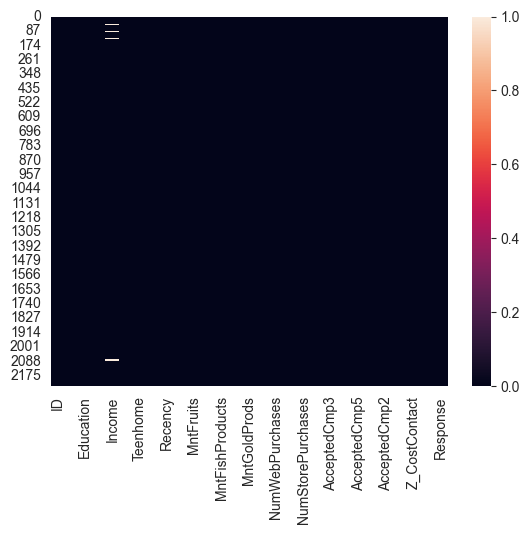

In [65]:
sns.heatmap(df.isnull())

In [66]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    23.750000     1.000000   
50%              2013-07-08 12:00:00    49.000000   173.500000     8.000000   
75%              2013-12-30 06:00:00    74.000000   504.250000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.962453   336.597393    39.773434   

       MntMeatProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean        166.950000  ...           5.316518      0.072768      0.074554   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%          16.000000  ...           3.000000      0.000000      0.000000   
50%          67.000000  ...           6.000000      0.000000      0.000000   
75%         232.000000  ...           7.000000      0.000000      0.000000   
max        1725.000000  ...          20.000000      1.000000      1.000000   
std         225.715373  ...           2.426645      0.259813      0.262728   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  
std          0.0     0.356274  

[8 rows x 27 columns]

* Z_CostContact, Z_Revenue have single unique value so we will drop that column
* we will also drop ID column

In [67]:
# seperating Categorical Values
cat_values = ['Education', 'Marital_Status','Kidhome',
       'Teenhome','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

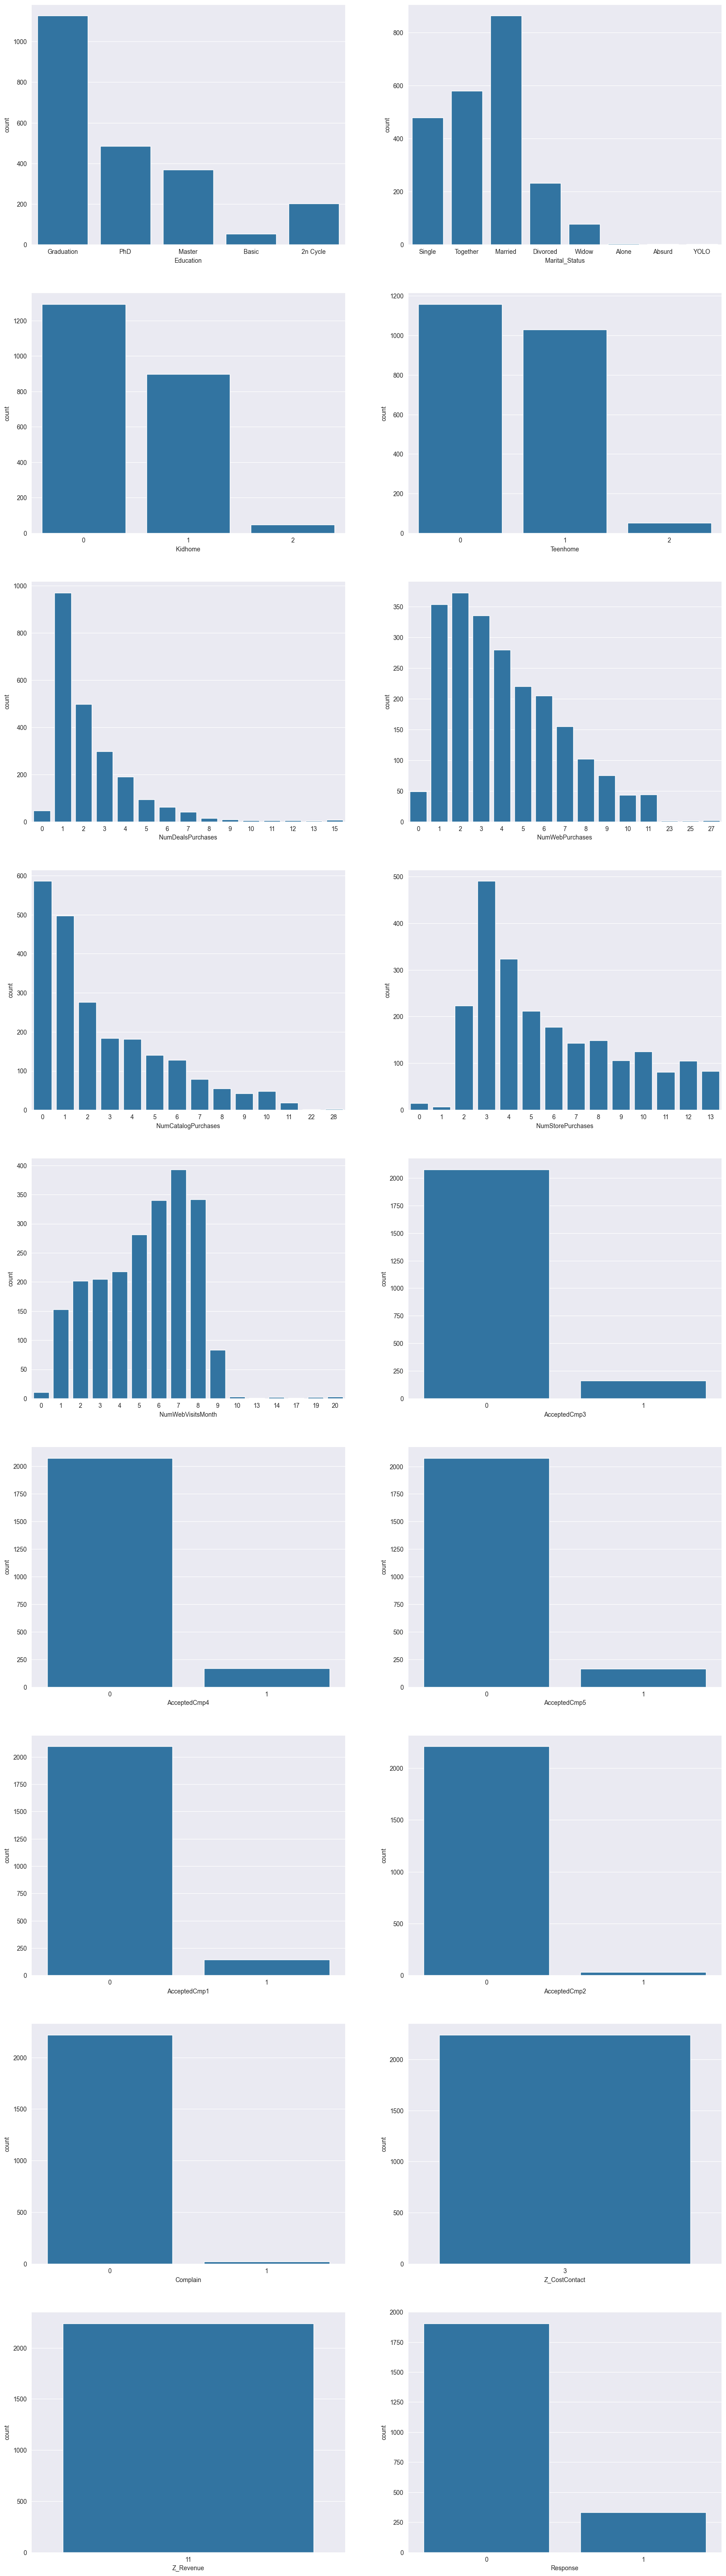

In [68]:
plt.figure(figsize=(20,150))
plt_no = 1
for i in cat_values:
    plt.subplot(len(cat_values),2,plt_no)
    sns.countplot(data=df,x=i)
    plt_no += 1
plt.show()
    

* Most of the customers completed there Graduation and very few customers who completed there basic edjucation
* Most of the customers are married

In [69]:
for i in cat_values:
    print(df[i].value_counts())
    print('-'*60)

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
------------------------------------------------------------
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
------------------------------------------------------------
Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64
------------------------------------------------------------
Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64
------------------------------------------------------------
NumDealsPurchases
1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: count, dtype: int64
------------------------------------------------------------
NumWebPurchases
2     373
1     354
3     336
4     280
5     220
6     

<Axes: xlabel='count', ylabel='Year_Birth'>

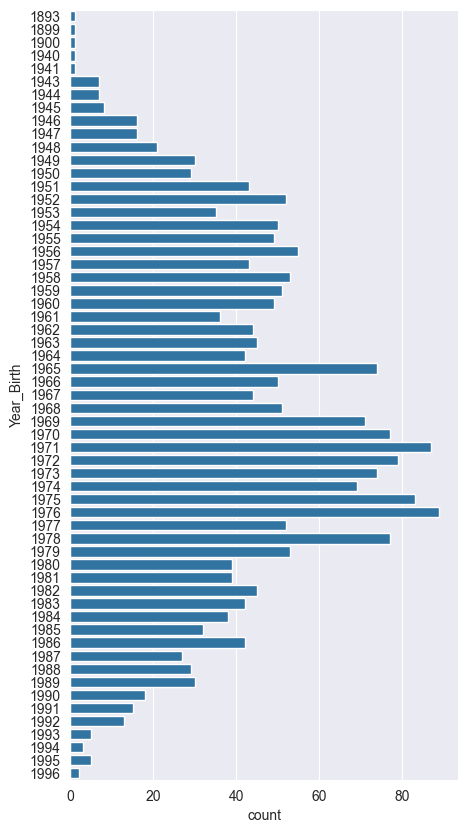

In [70]:
plt.figure(figsize=(5,10))
sns.countplot(data=df,y='Year_Birth')

* Most of the customers born between year 1954 to 1980

In [71]:
# adding age of customer 
df['Age'] = df['Dt_Customer'].apply(lambda x : x.year) - df['Year_Birth']

In [72]:
df['Total_spending'] = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis = 1)

In [73]:
# finding total spending of each customer
df2 = df.drop(cat_values + ['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'],axis=1)

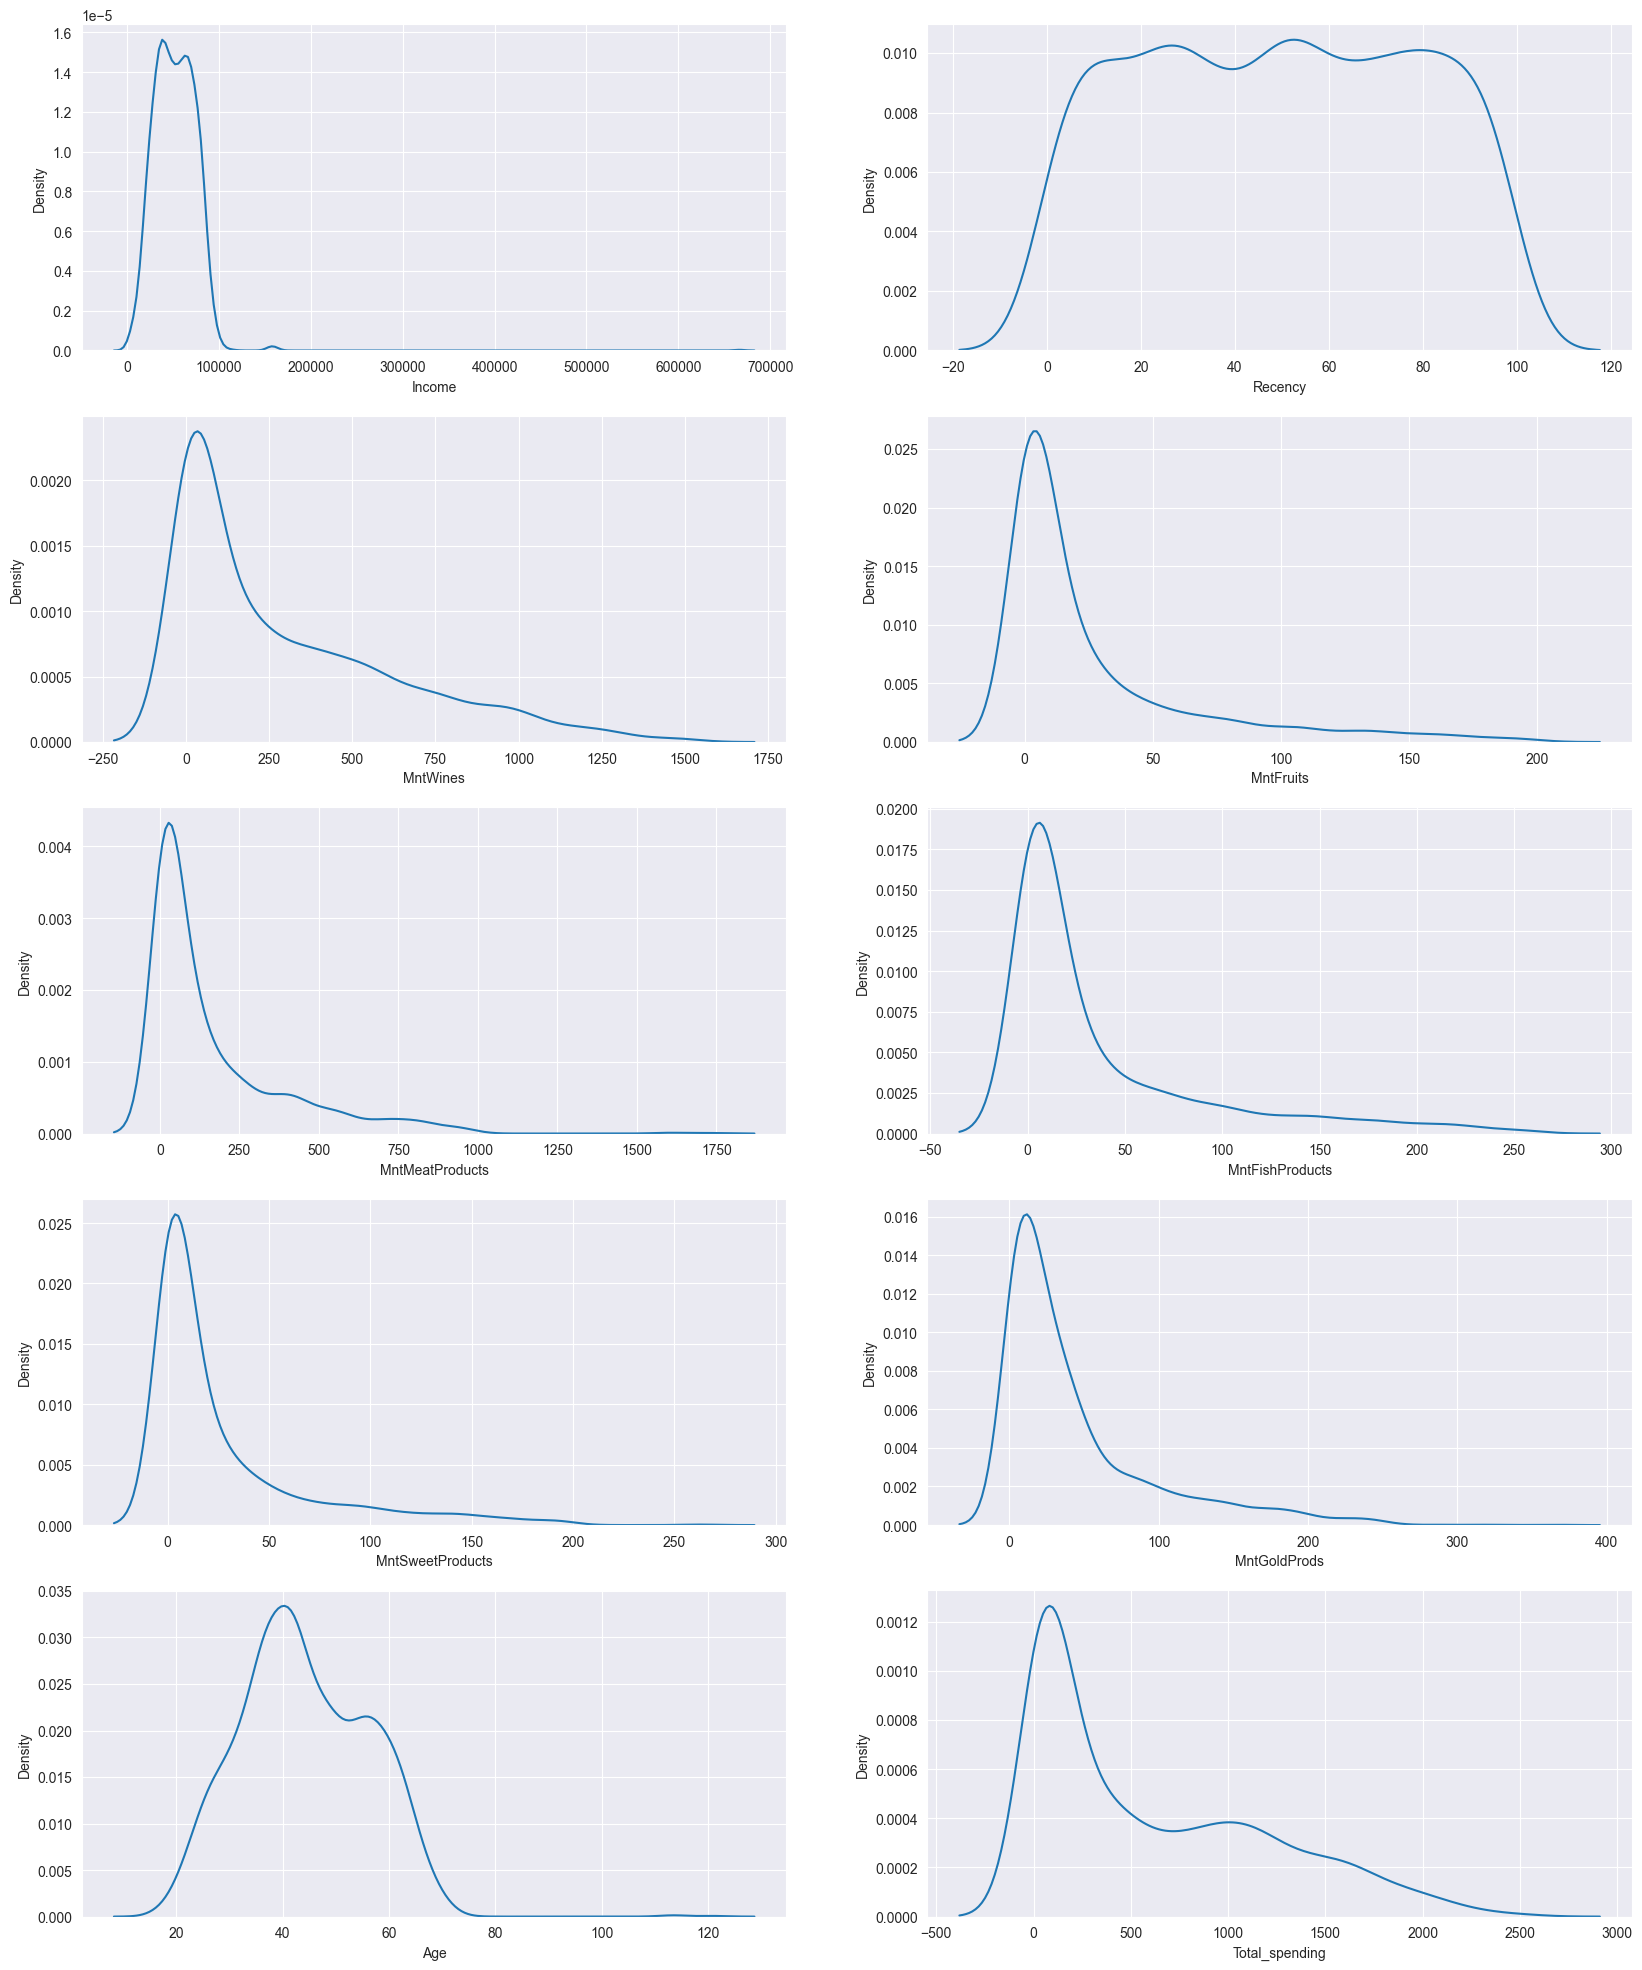

In [74]:
plt.figure(figsize=(20,50))
plt_no = 1
for i in df2.columns:
    plt.subplot(len(df2.columns),2,plt_no)
    sns.kdeplot(df[i])
    plt_no += 1
plt.show()

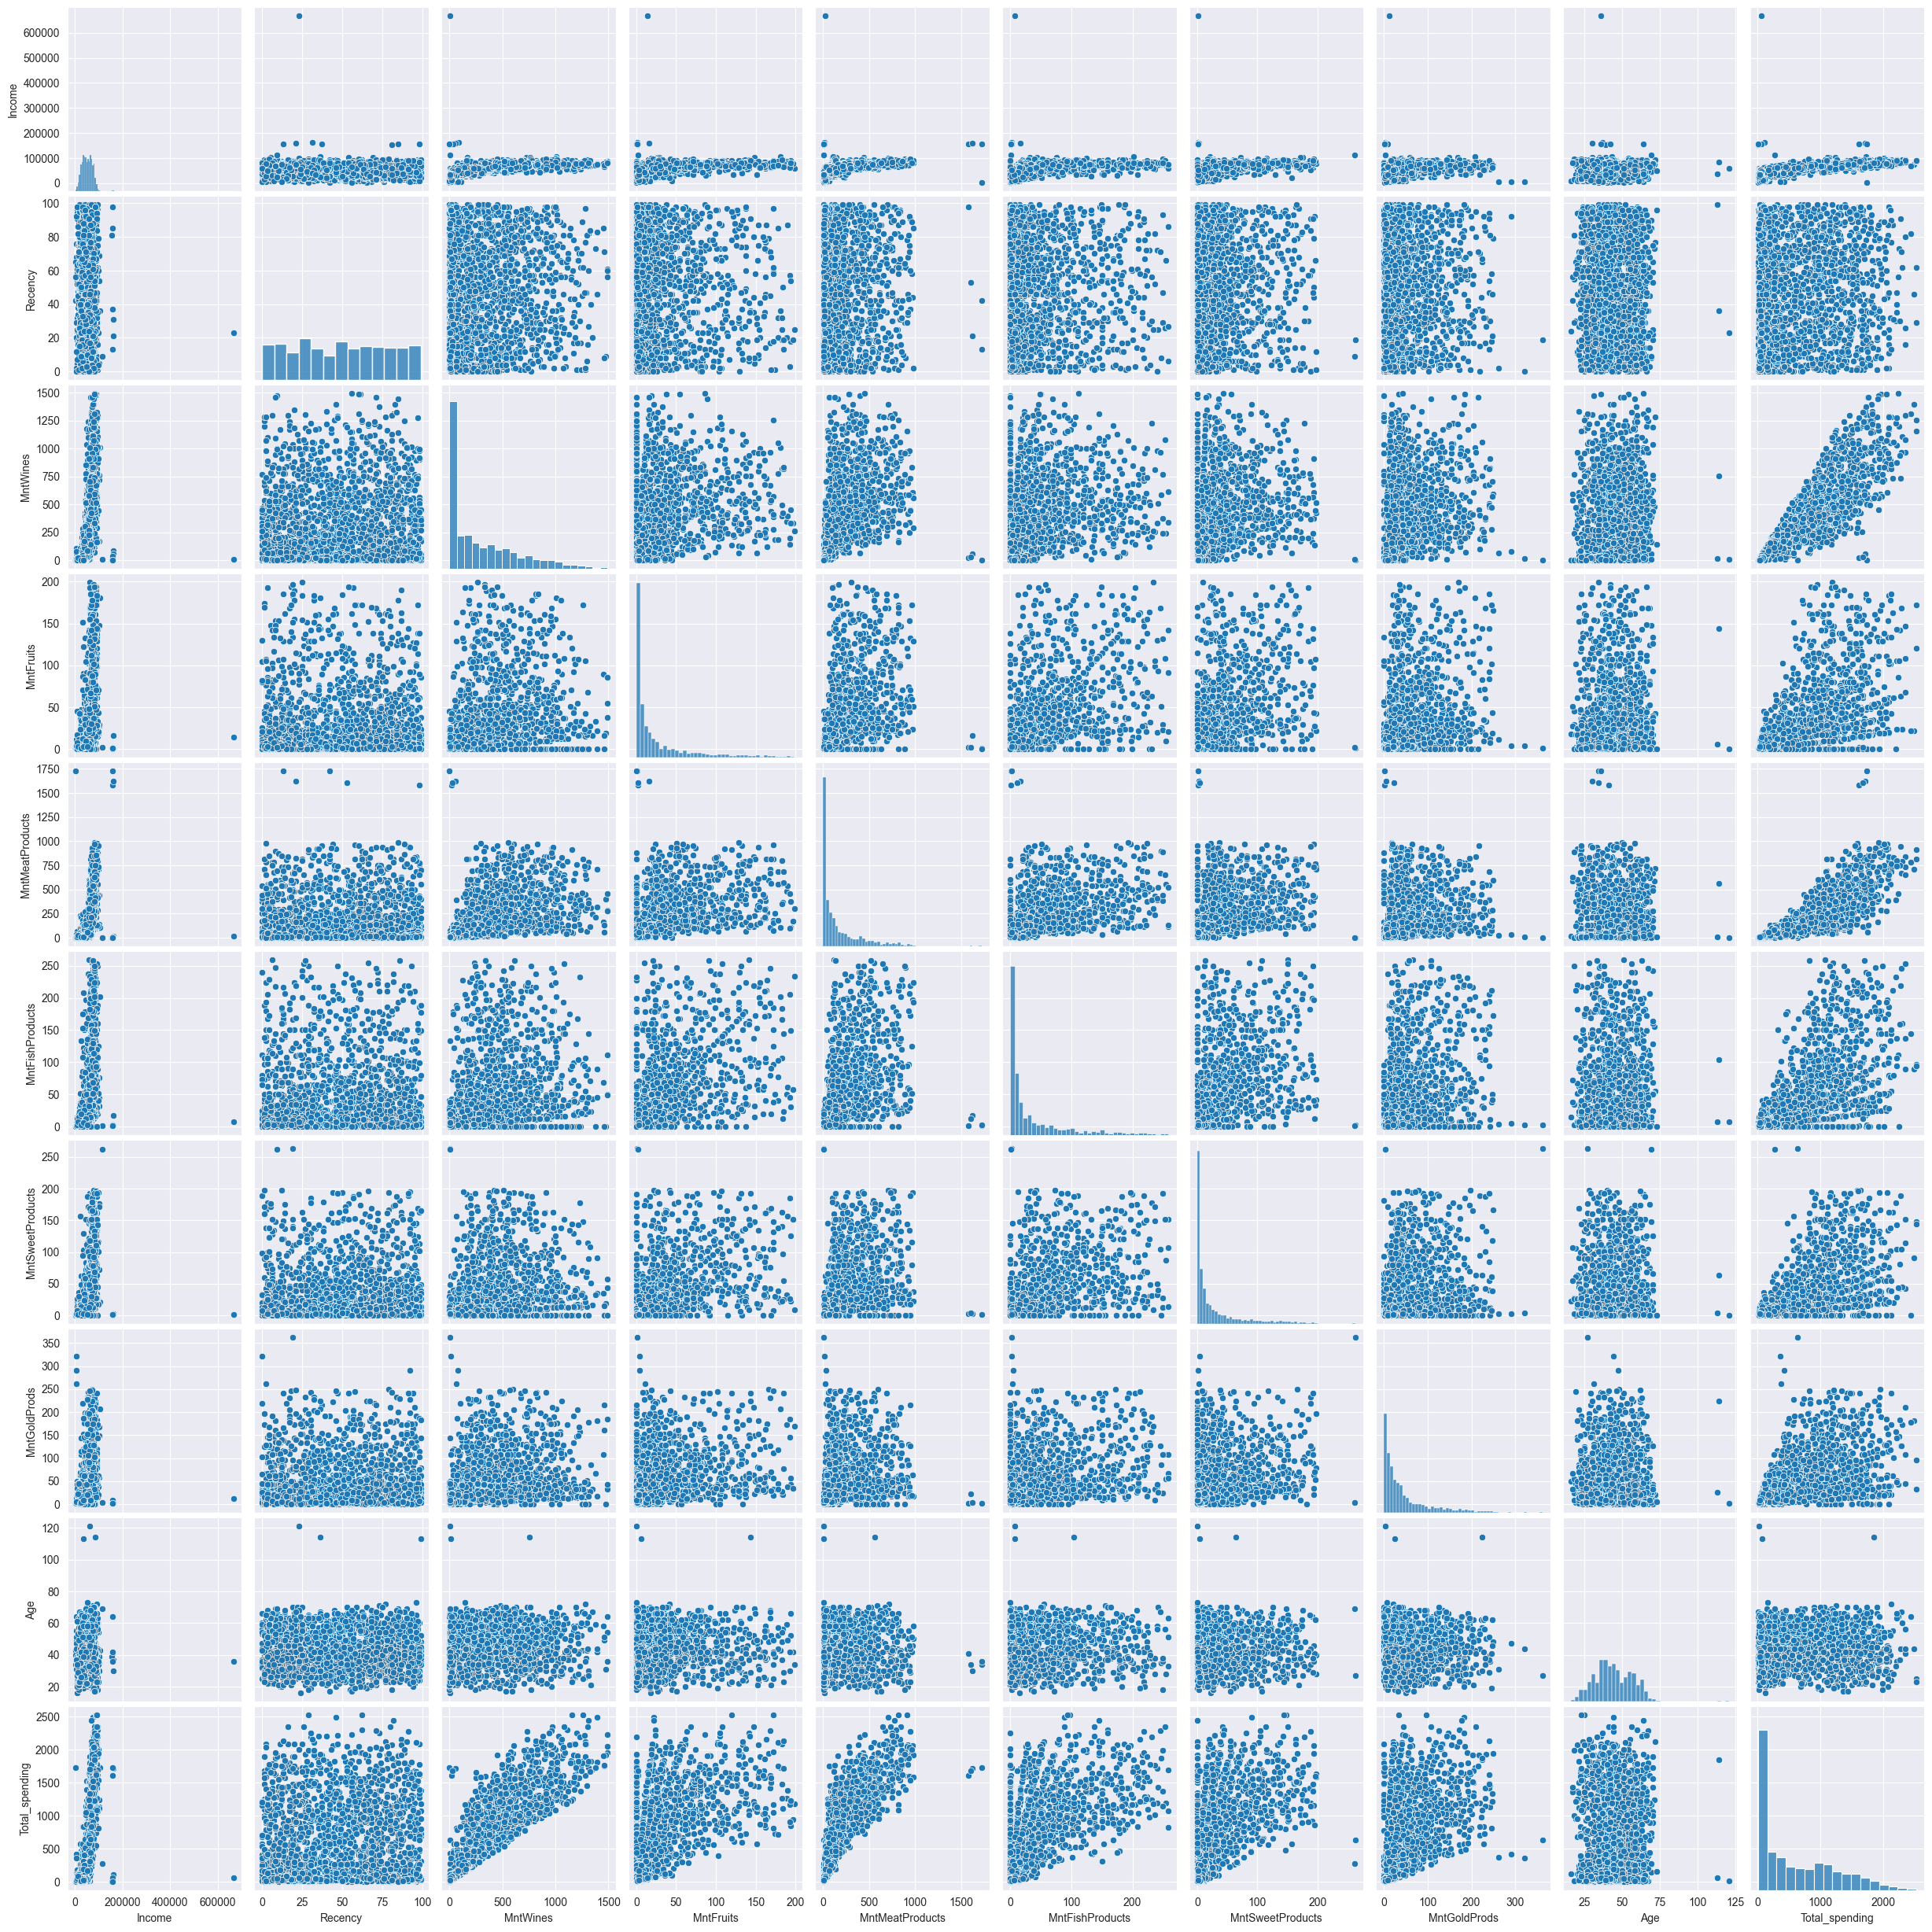

In [75]:
sns.pairplot(df2)

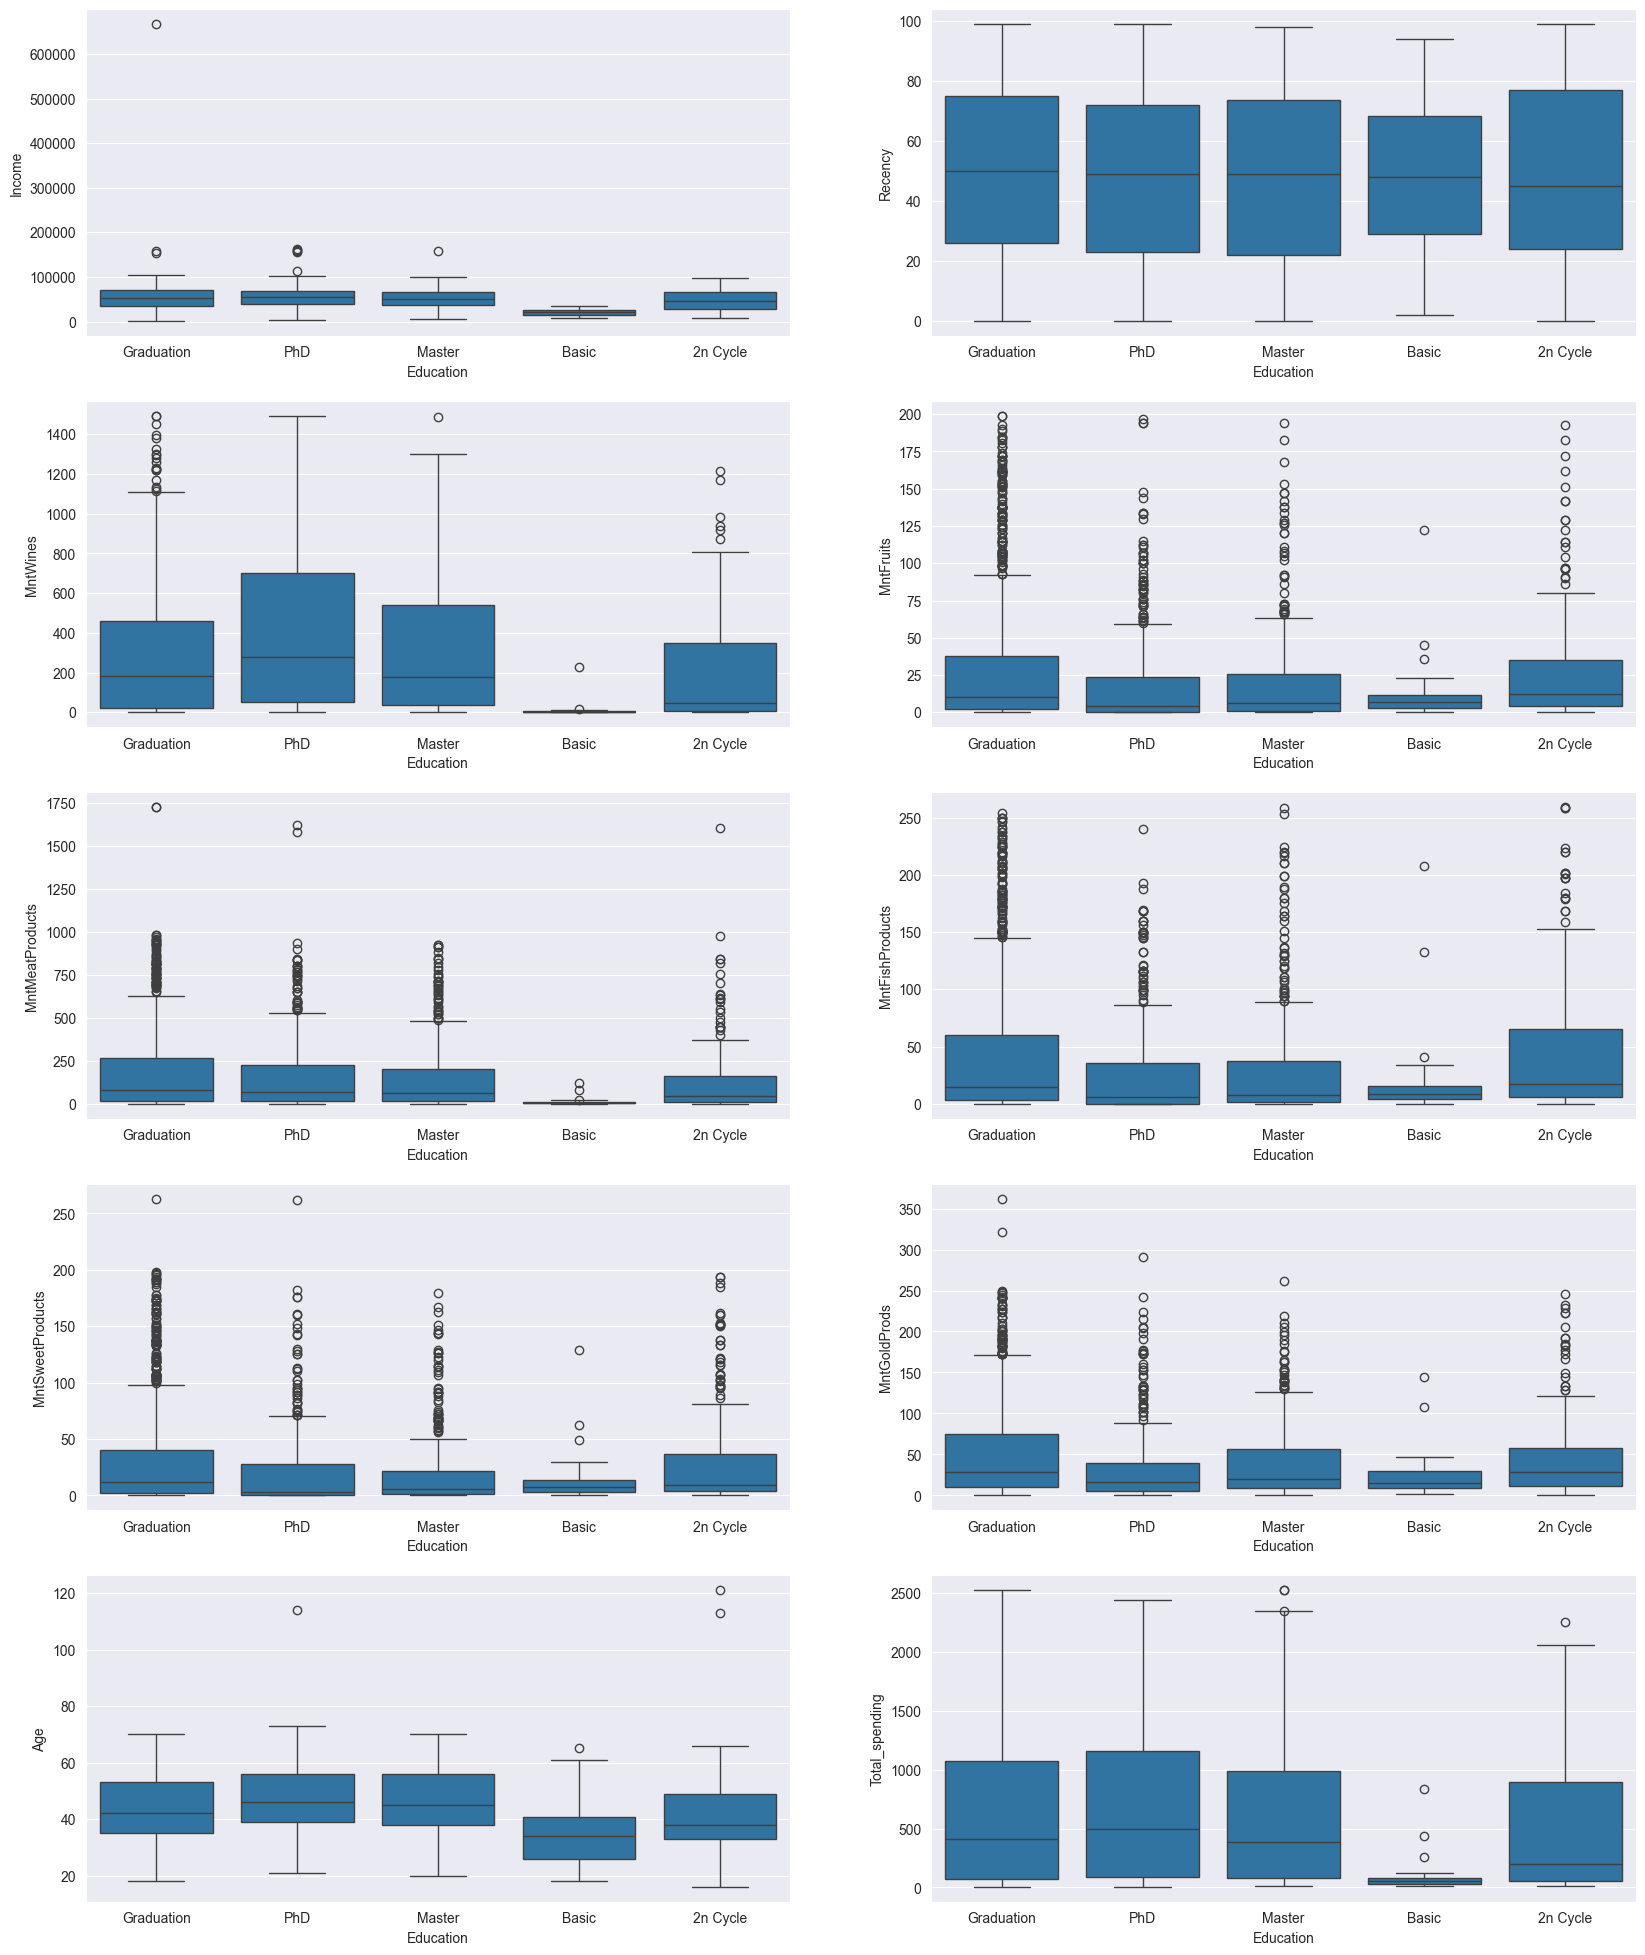

In [76]:
plt.figure(figsize=(20,50))
plt_no = 1
for i in df2.columns:
    plt.subplot(len(df2.columns),2,plt_no)
    sns.boxplot(data=df,x='Education',y=i)
    plt_no += 1
plt.show()

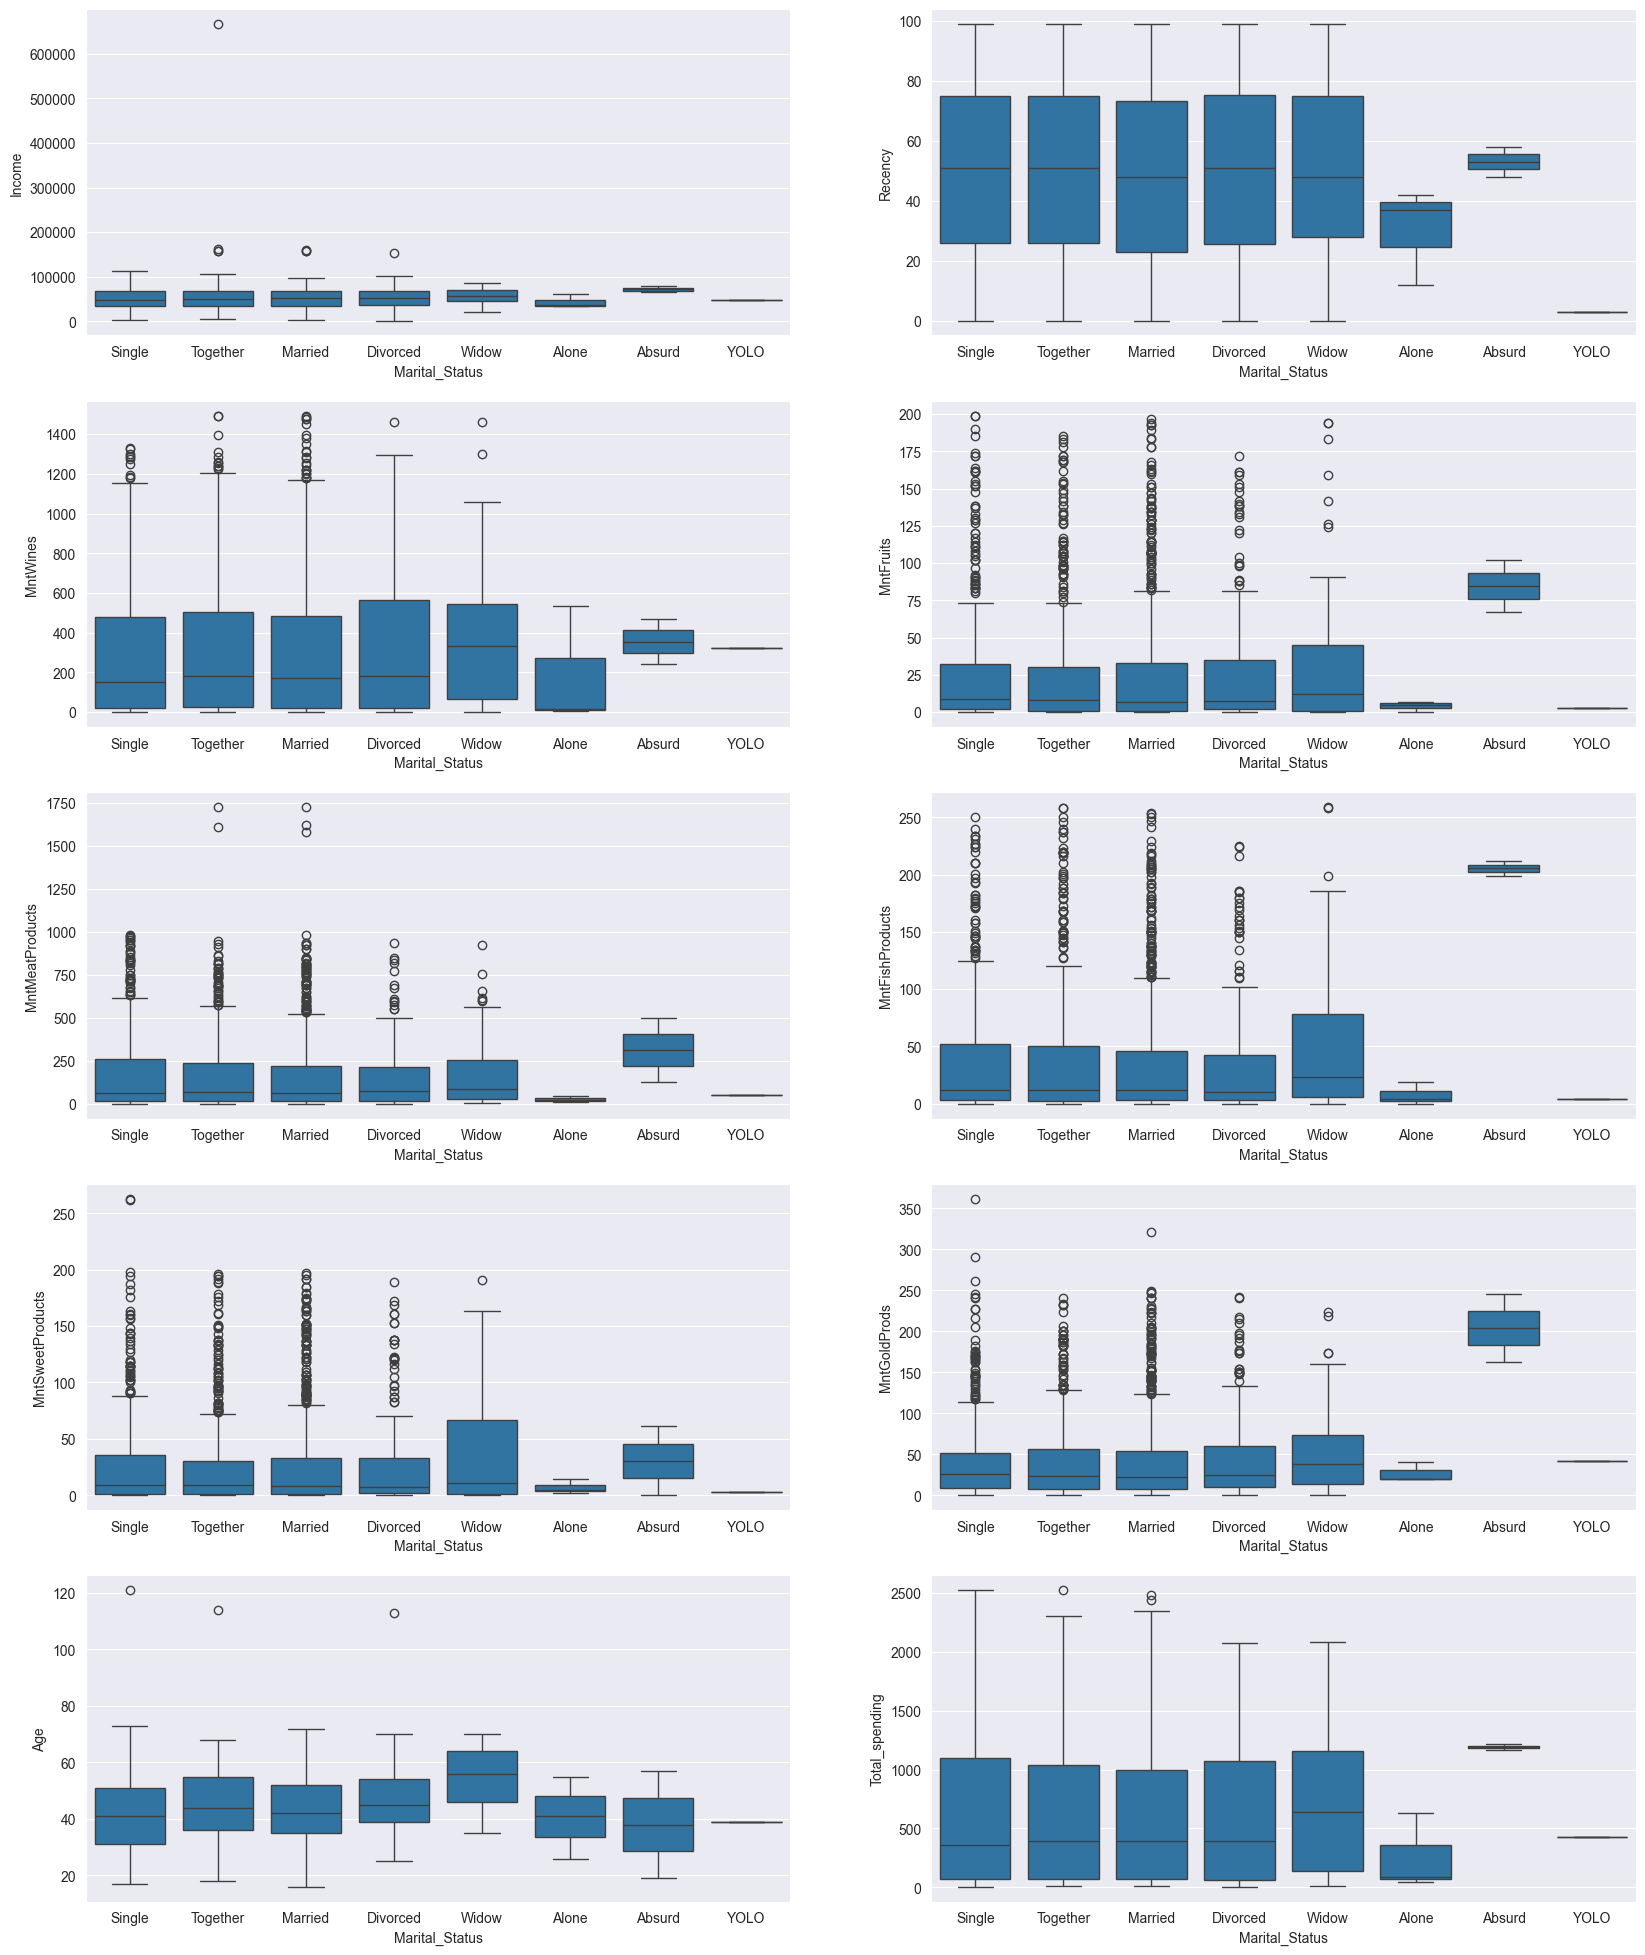

In [77]:
plt.figure(figsize=(20,50))
plt_no = 1
for i in df2.columns:
    plt.subplot(len(df2.columns),2,plt_no)
    sns.boxplot(data=df,x='Marital_Status',y=i)
    plt_no += 1
plt.show()

* we can see the skewness and some outliers in age, income, amount spend on gold, meat etc. features
* where Recency have normally distribution and dont have any outliers

<Axes: xlabel='Total_spending', ylabel='Income'>

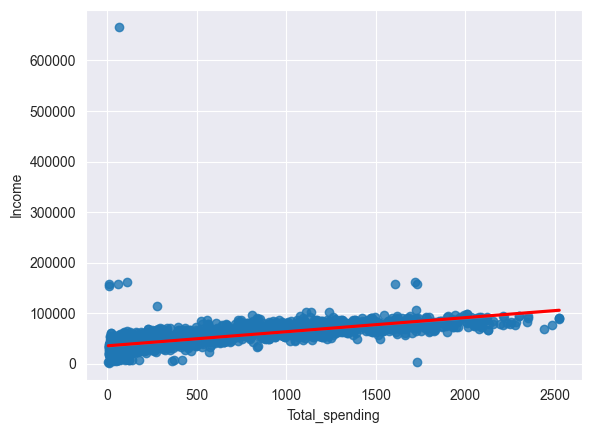

In [78]:
sns.regplot(data=df,x='Total_spending',y='Income',line_kws={'color':'red'})

* As income increases spending also increases

# Feature Engineering

In [79]:
df.dropna(inplace=True) # dropping null values from data set

In [80]:
df['Year_Birth'] = df['Year_Birth'].apply(lambda x: df['Year_Birth'].median() if x <= 1900 else x)

In [81]:
df['Income'] = df['Income'].apply(lambda x : df[df['Education']== 'Graduation']['Income'].median() if x > 600000 else x)

In [82]:
df['Age'] = df['Age'].apply(lambda x :df['Age'].median() if x > 100 else x)

In [83]:
marketing_data = df.drop(['ID','Dt_Customer','Z_CostContact', 'Z_Revenue','Response','Complain'],axis=1)

In [84]:
marketing_data = pd.get_dummies(marketing_data,drop_first=True)

In [85]:
marketing_data.head()

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      1957.0  58138.0        0         0       58       635         88   
1      1954.0  46344.0        1         1       38        11          1   
2      1965.0  71613.0        0         0       26       426         49   
3      1984.0  26646.0        1         0       26        11          4   
4      1981.0  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0              546              172                88  ...   
1                6                2                 1  ...   
2              127              111                21  ...   
3               20               10                 3  ...   
4              118               46                27  ...   

   Education_Graduation  Education_Master  Education_PhD  \
0                  True             False          False   
1                  True             False          False   
2                  True             False          False   
3                  True             False          False   
4                 False             False           True   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                 False                    False                   False   
1                 False                    False                   False   
2                 False                    False                   False   
3                 False                    False                   False   
4                 False                    False                    True   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                   True                    False                 False   
1                   True                    False                 False   
2                  False                     True                 False   
3                  False                     True                 False   
4                  False                    False                 False   

   Marital_Status_YOLO  
0                False  
1                False  
2                False  
3                False  
4                False  

[5 rows x 34 columns]

In [86]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(marketing_data)

In [87]:
scaled_data = pd.DataFrame(scaled_data,columns=marketing_data.columns)

In [88]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [89]:
pca_data = pd.DataFrame(pca_data,columns=['PC1','PC2'])

# KMean Clustering

Text(0, 0.5, 'WCSS')

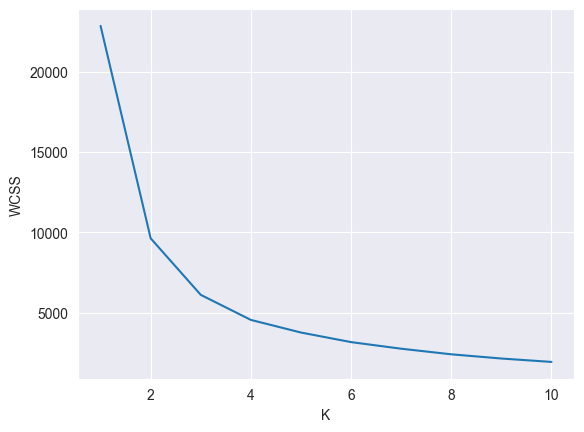

In [90]:
# Elbow method to find out no of clusters
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters=i).fit(pca_data)
    WCSS.append(model.inertia_)
plt.plot(range(1,11),WCSS)
plt.xlabel('K')
plt.ylabel('WCSS')

Text(0, 0.5, 'silhouette score')

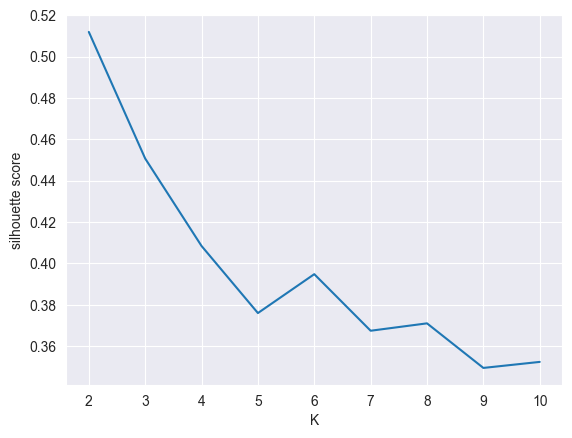

In [91]:
score = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,random_state=11).fit(pca_data)
    score.append(silhouette_score(pca_data,kmeans.labels_))
plt.plot(range(2,11),score)
plt.xlabel('K')
plt.ylabel('silhouette score')

In [92]:
# creating K-mean clusturing model
kmean_model = KMeans(n_clusters=3)
prediction = kmean_model.fit_predict(pca_data)

In [93]:
# finding out cluster centers
kmean_model.cluster_centers_

array([[-2.48842224, -0.65648892],
       [ 3.71498218, -0.79996011],
       [ 0.25146561,  1.6418064 ]])

In [94]:
pca_data['KMean_Cluster'] = prediction

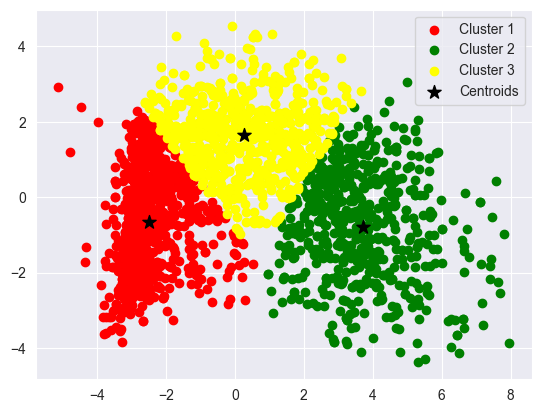

In [95]:
cluster = 'KMean_Cluster'
plt.scatter(pca_data[pca_data[cluster]==0]['PC1'],pca_data[pca_data[cluster]==0]['PC2'],c='Red',label = 'Cluster 1')
plt.scatter(pca_data[pca_data[cluster]==1]['PC1'],pca_data[pca_data[cluster]==1]['PC2'],c='Green',label = 'Cluster 2')
plt.scatter(pca_data[pca_data[cluster]==2]['PC1'],pca_data[pca_data[cluster]==2]['PC2'],c='Yellow',label = 'Cluster 3')
plt.scatter(kmean_model.cluster_centers_[:,0],kmean_model.cluster_centers_[:,1],s=100, label = 'Centroids',marker = '*',c = 'black')
plt.legend()
plt.show()

# Agglomerative Clustering

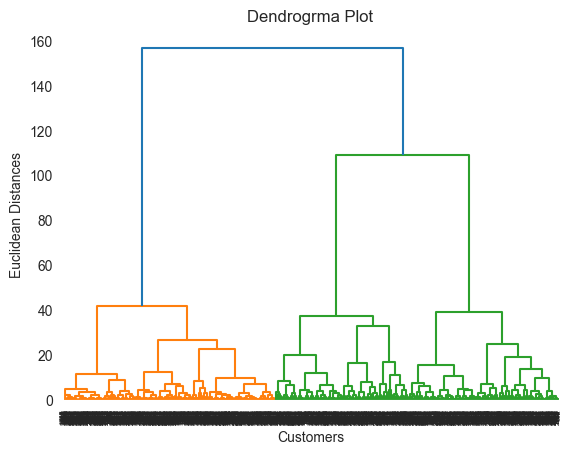

In [96]:
# finding out appropriate no of clusters for AgglomerativeClustering
dendro = shc.dendrogram(shc.linkage(pca_data, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()  

In [97]:
# creating AgglomerativeClustering model
agg_model= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_pred= agg_model.fit_predict(pca_data)

In [98]:
pca_data['Agg_cluster'] = y_pred

In [99]:
pca_data['Agg_cluster'].value_counts()

Agg_cluster
0    1265
1     951
Name: count, dtype: int64

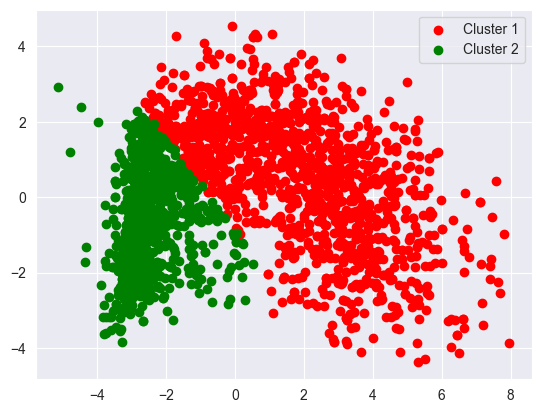

In [100]:
cluster = 'Agg_cluster'
plt.scatter(pca_data[pca_data[cluster]==0]['PC1'],pca_data[pca_data[cluster]==0]['PC2'],c='Red',label = 'Cluster 1')
plt.scatter(pca_data[pca_data[cluster]==1]['PC1'],pca_data[pca_data[cluster]==1]['PC2'],c='Green',label = 'Cluster 2')
plt.legend()
plt.show()

# DBSCAN Clustering

In [101]:
# DBSCAN clustering Model
dbscan_model = DBSCAN()

In [102]:
# finding out appropriate no of eps and min samples
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 20]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(pca_data)
        labels = dbscan.labels_
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f"eps={eps}, min_samples={min_samples}, num_clusters={num_clusters}")

eps=0.5, min_samples=5, num_clusters=5
eps=0.5, min_samples=10, num_clusters=4
eps=0.5, min_samples=20, num_clusters=3
eps=1.0, min_samples=5, num_clusters=3
eps=1.0, min_samples=10, num_clusters=3
eps=1.0, min_samples=20, num_clusters=3
eps=1.5, min_samples=5, num_clusters=2
eps=1.5, min_samples=10, num_clusters=2
eps=1.5, min_samples=20, num_clusters=2


In [103]:
# Fitting DBSCAN clustering Model
dbscan = DBSCAN(eps=1, min_samples= 10)
y_pred_dbscan = dbscan.fit_predict(pca_data)

In [104]:
pca_data['dbscan_cluster'] = y_pred_dbscan

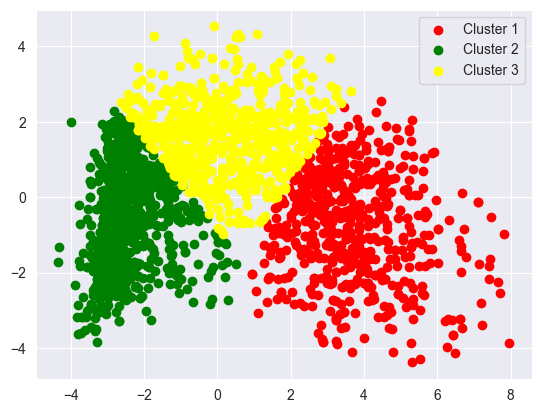

In [105]:
cluster = 'dbscan_cluster'
plt.scatter(pca_data[pca_data[cluster]==0]['PC1'],pca_data[pca_data[cluster]==0]['PC2'],c='Red',label = 'Cluster 1')
plt.scatter(pca_data[pca_data[cluster]==1]['PC1'],pca_data[pca_data[cluster]==1]['PC2'],c='Green',label = 'Cluster 2')
plt.scatter(pca_data[pca_data[cluster]==2]['PC1'],pca_data[pca_data[cluster]==2]['PC2'],c='Yellow',label = 'Cluster 3')
plt.legend()
plt.show()

In [106]:
df['Cluster'] = prediction

<Axes: xlabel='Cluster'>

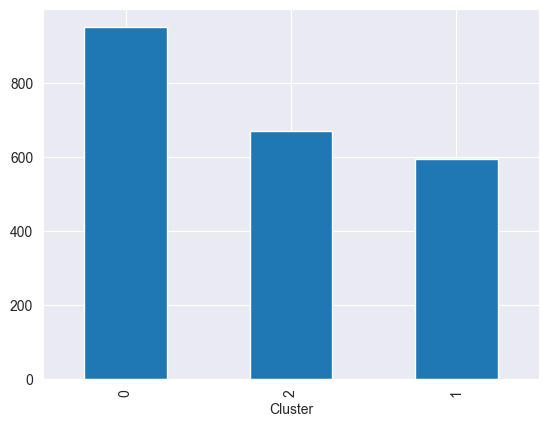

In [107]:
df['Cluster'].value_counts().plot(kind='bar')

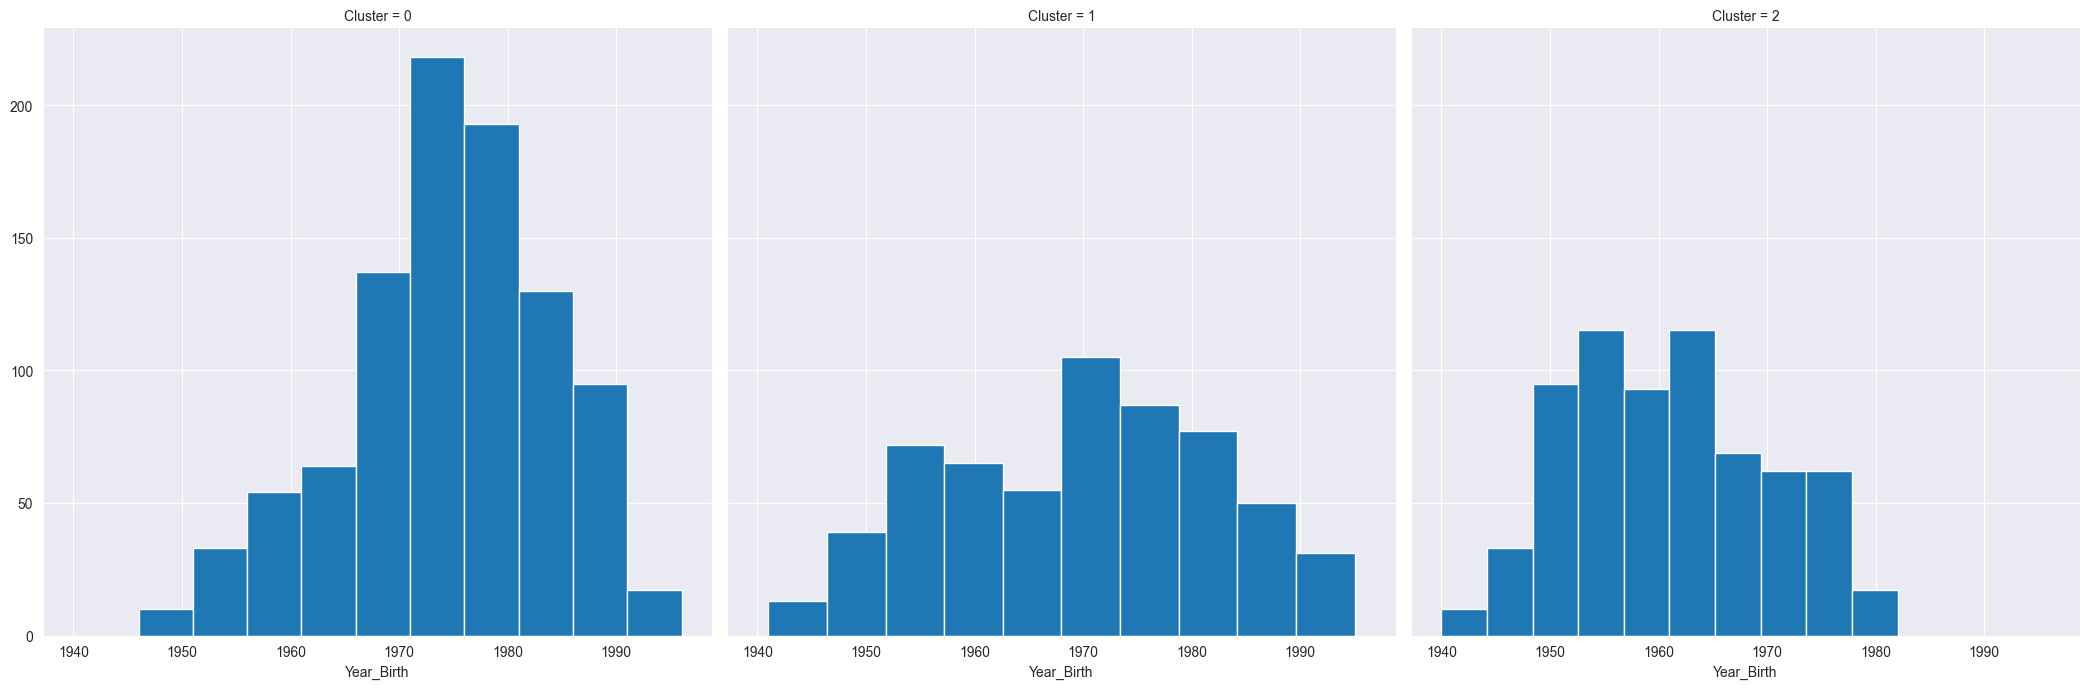

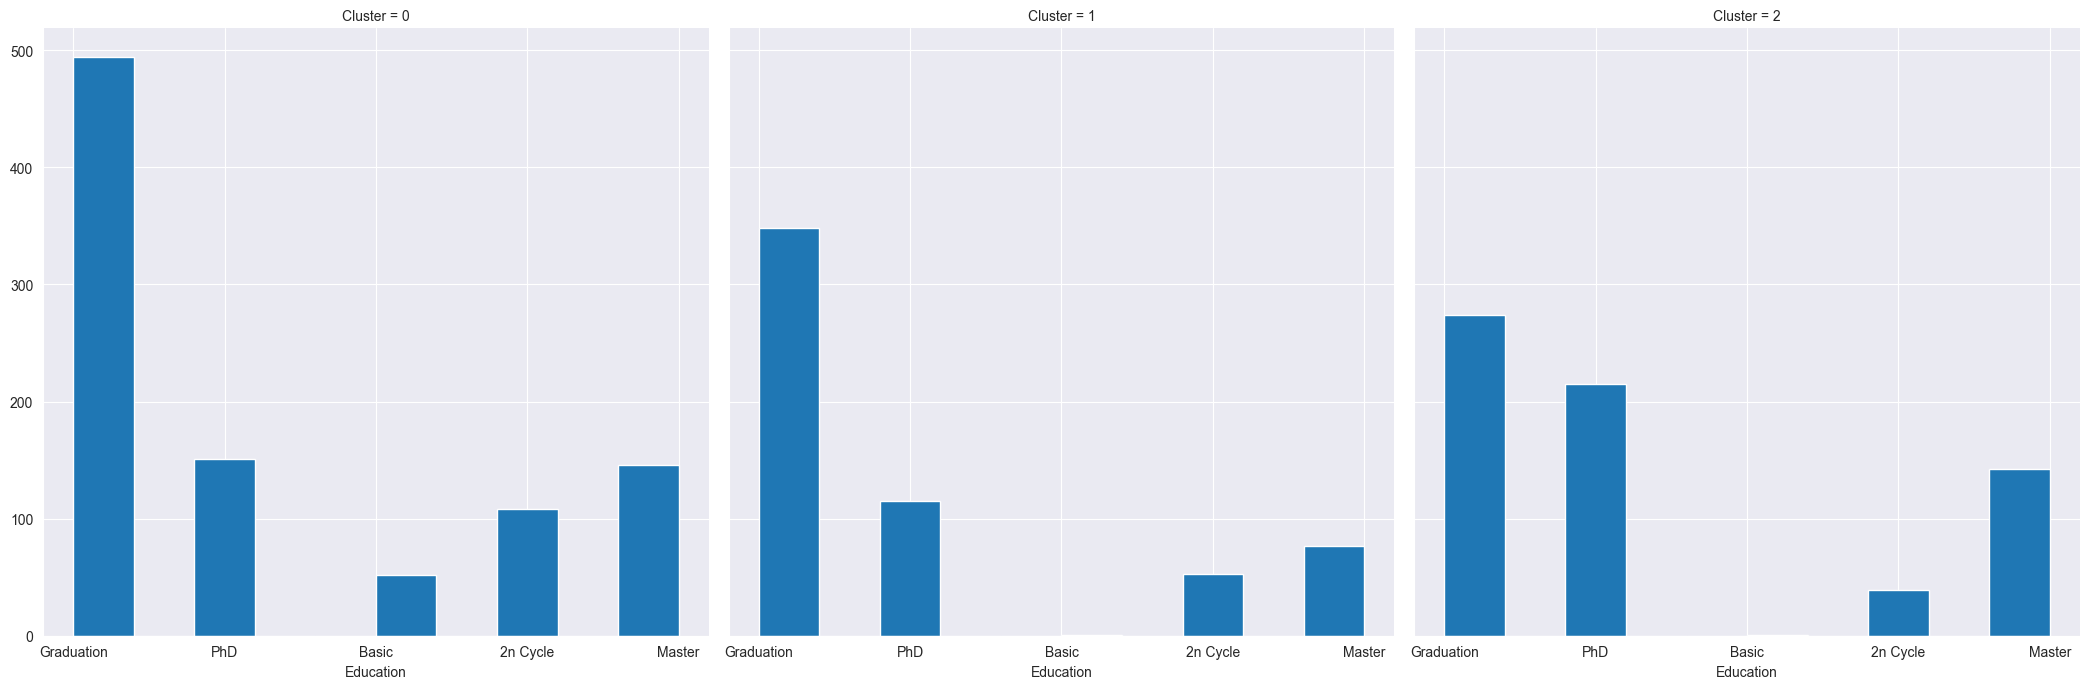

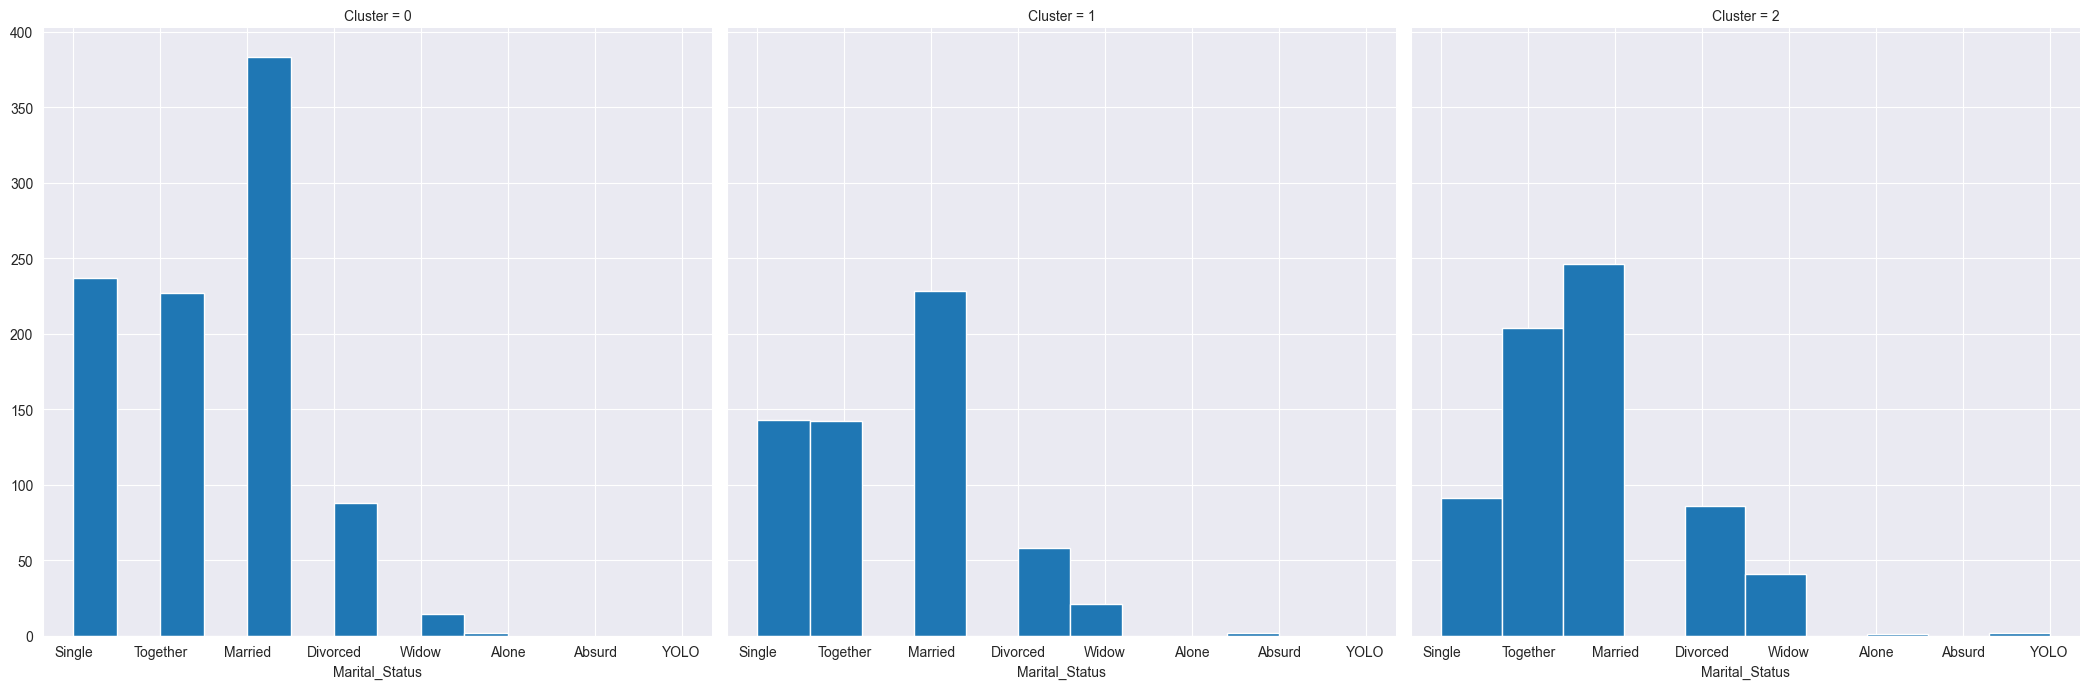

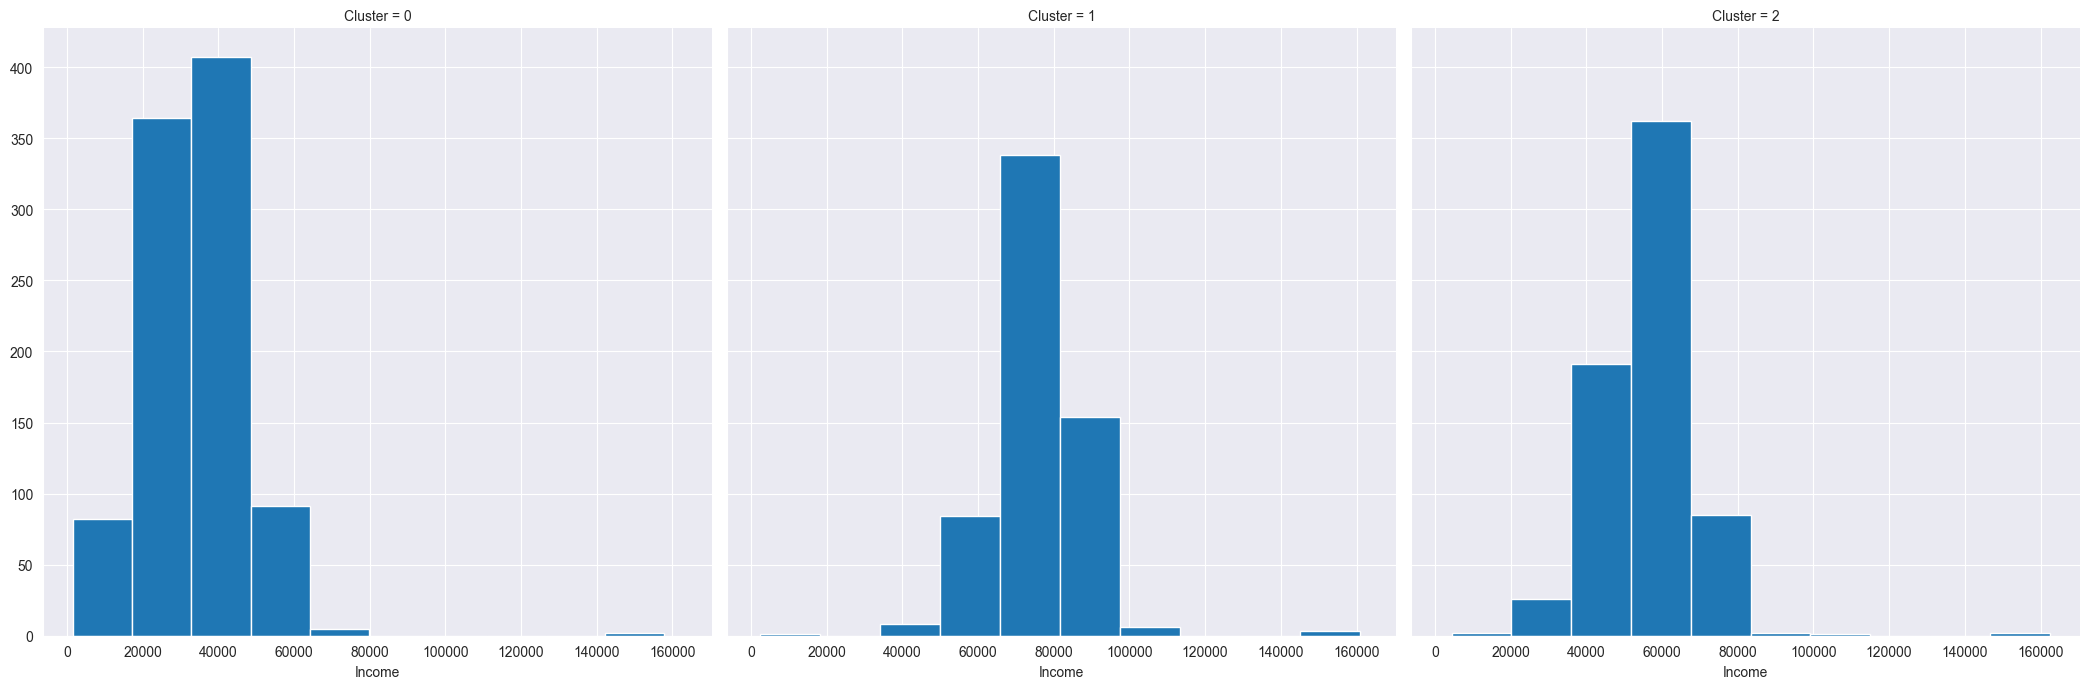

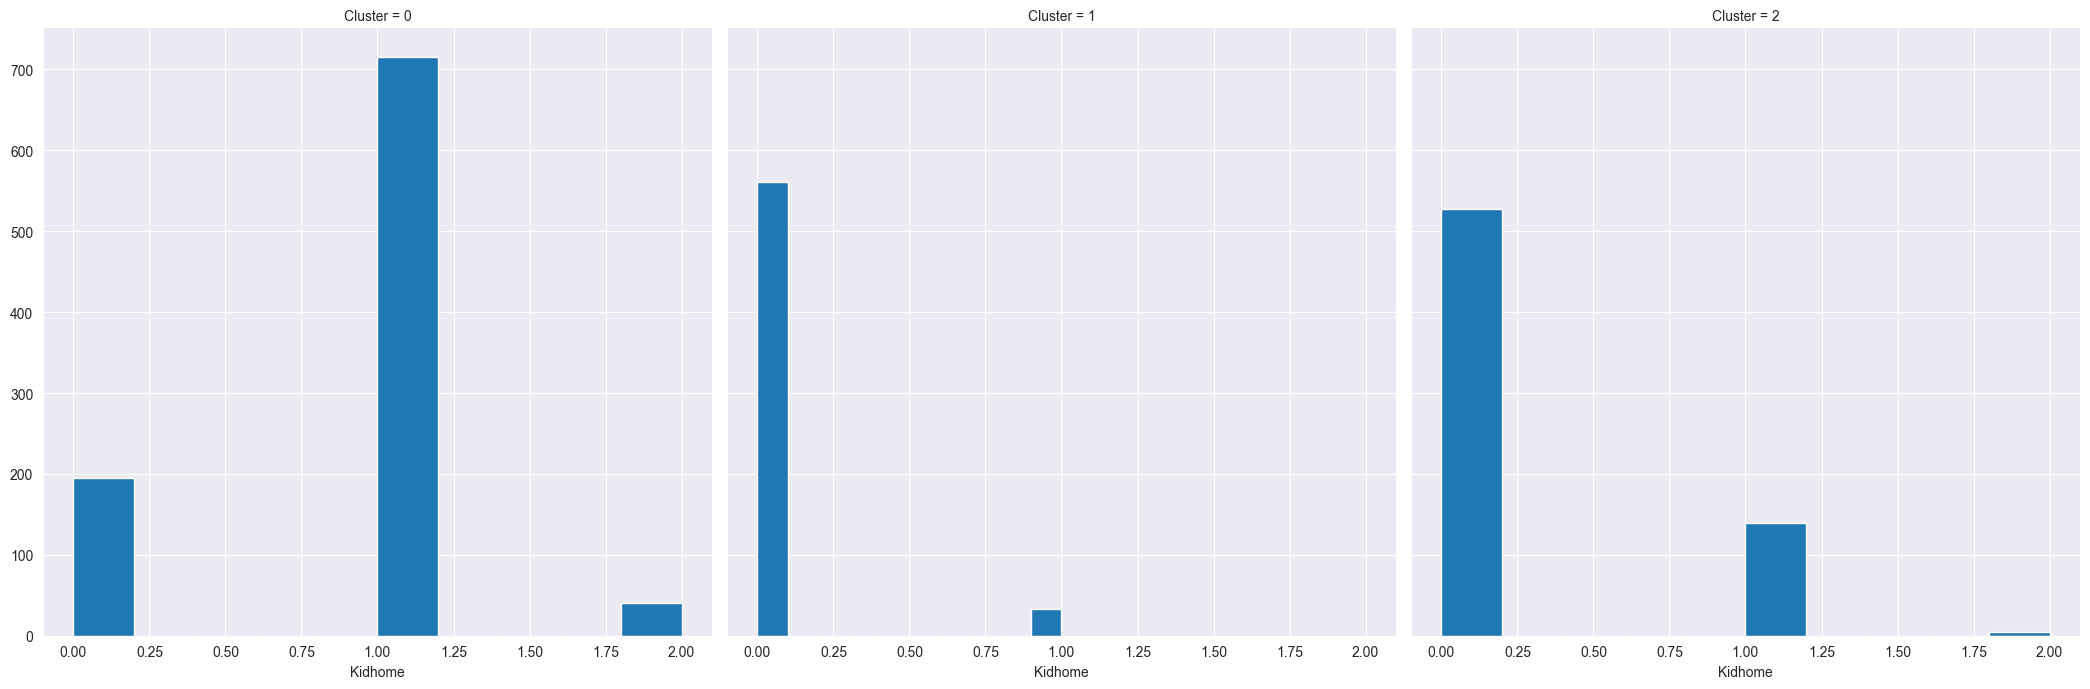

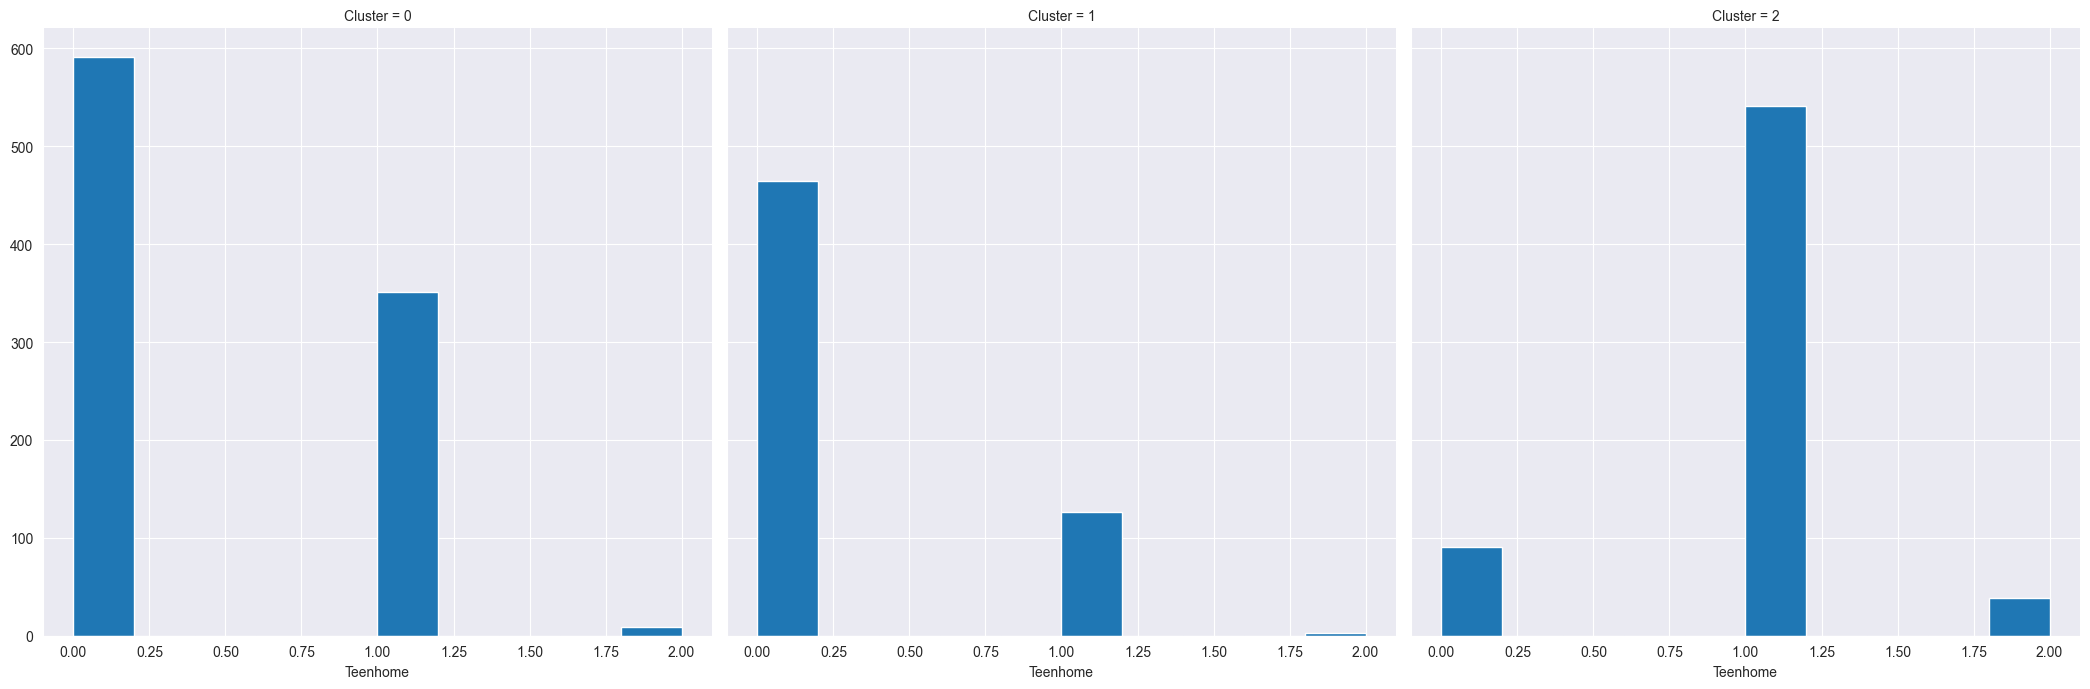

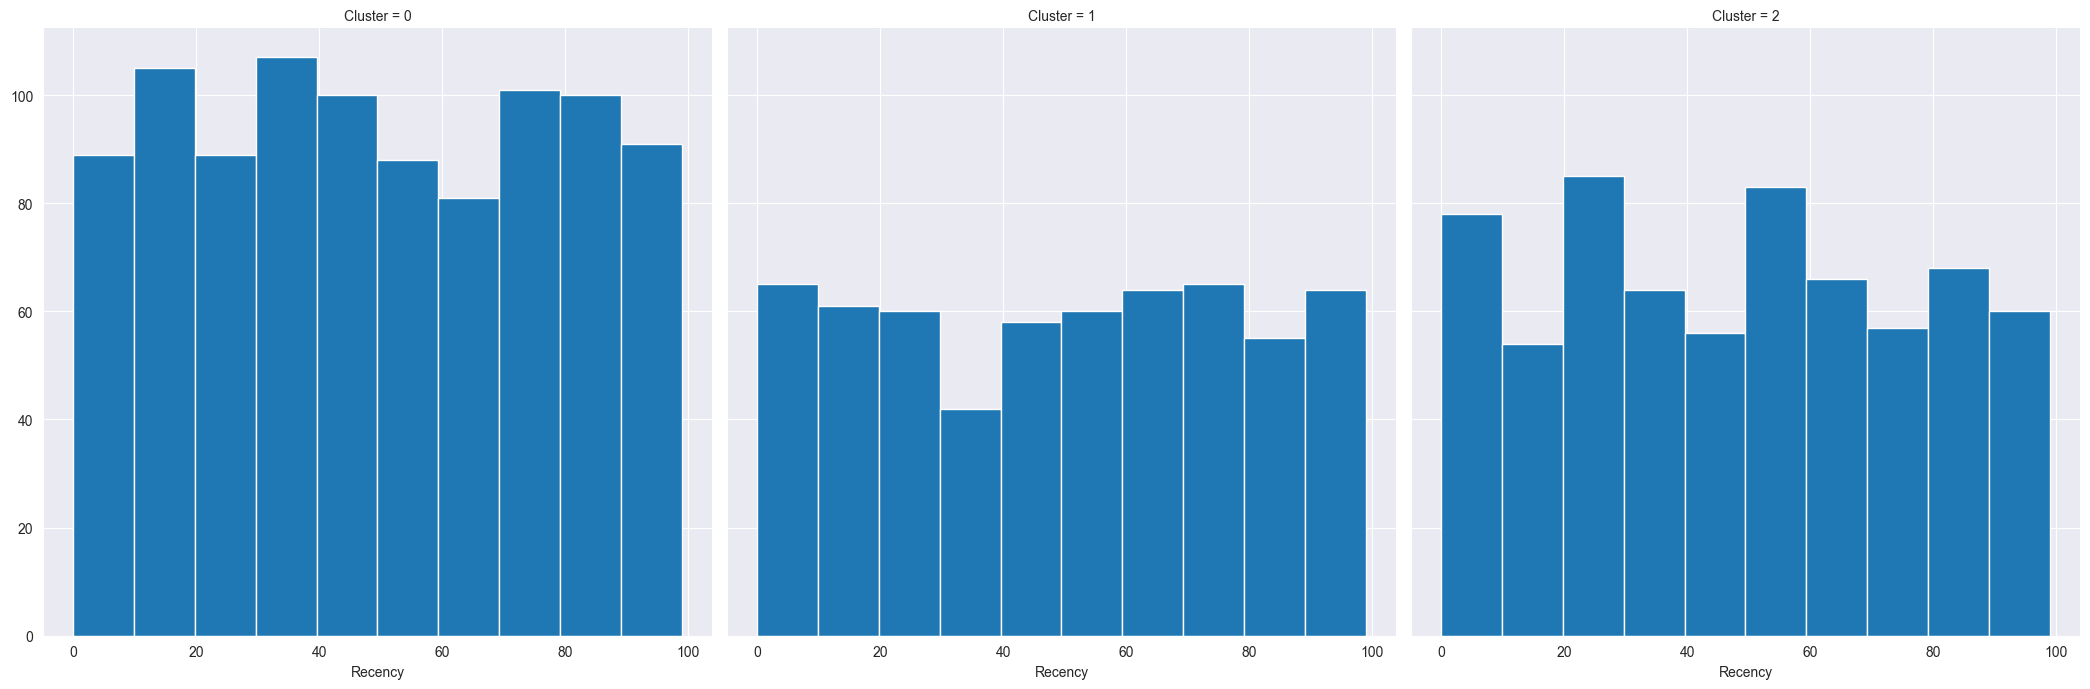

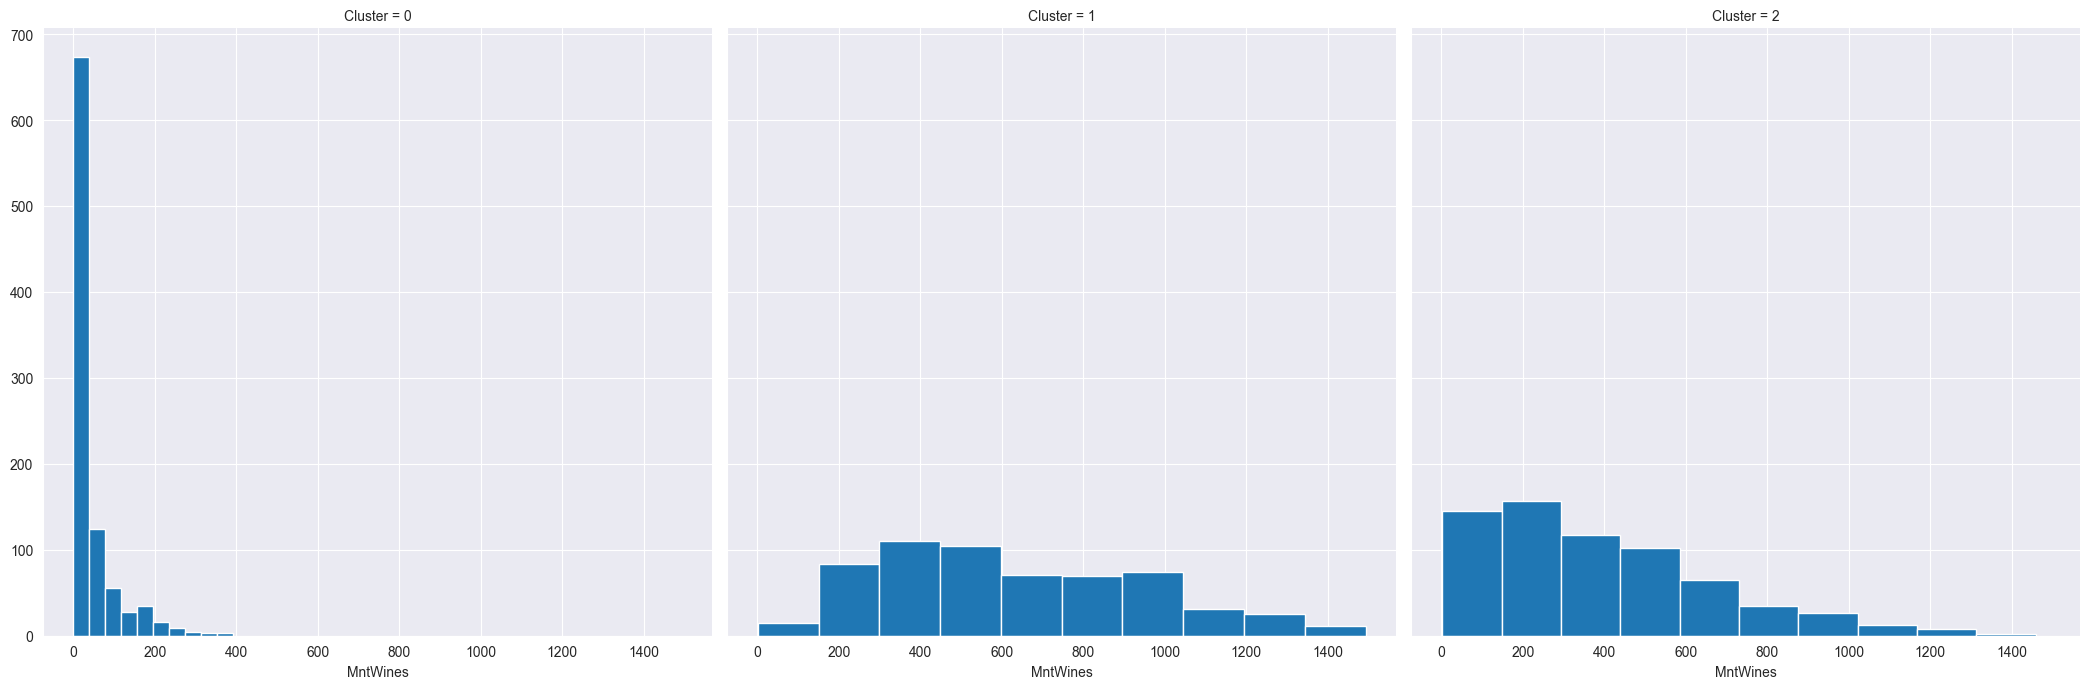

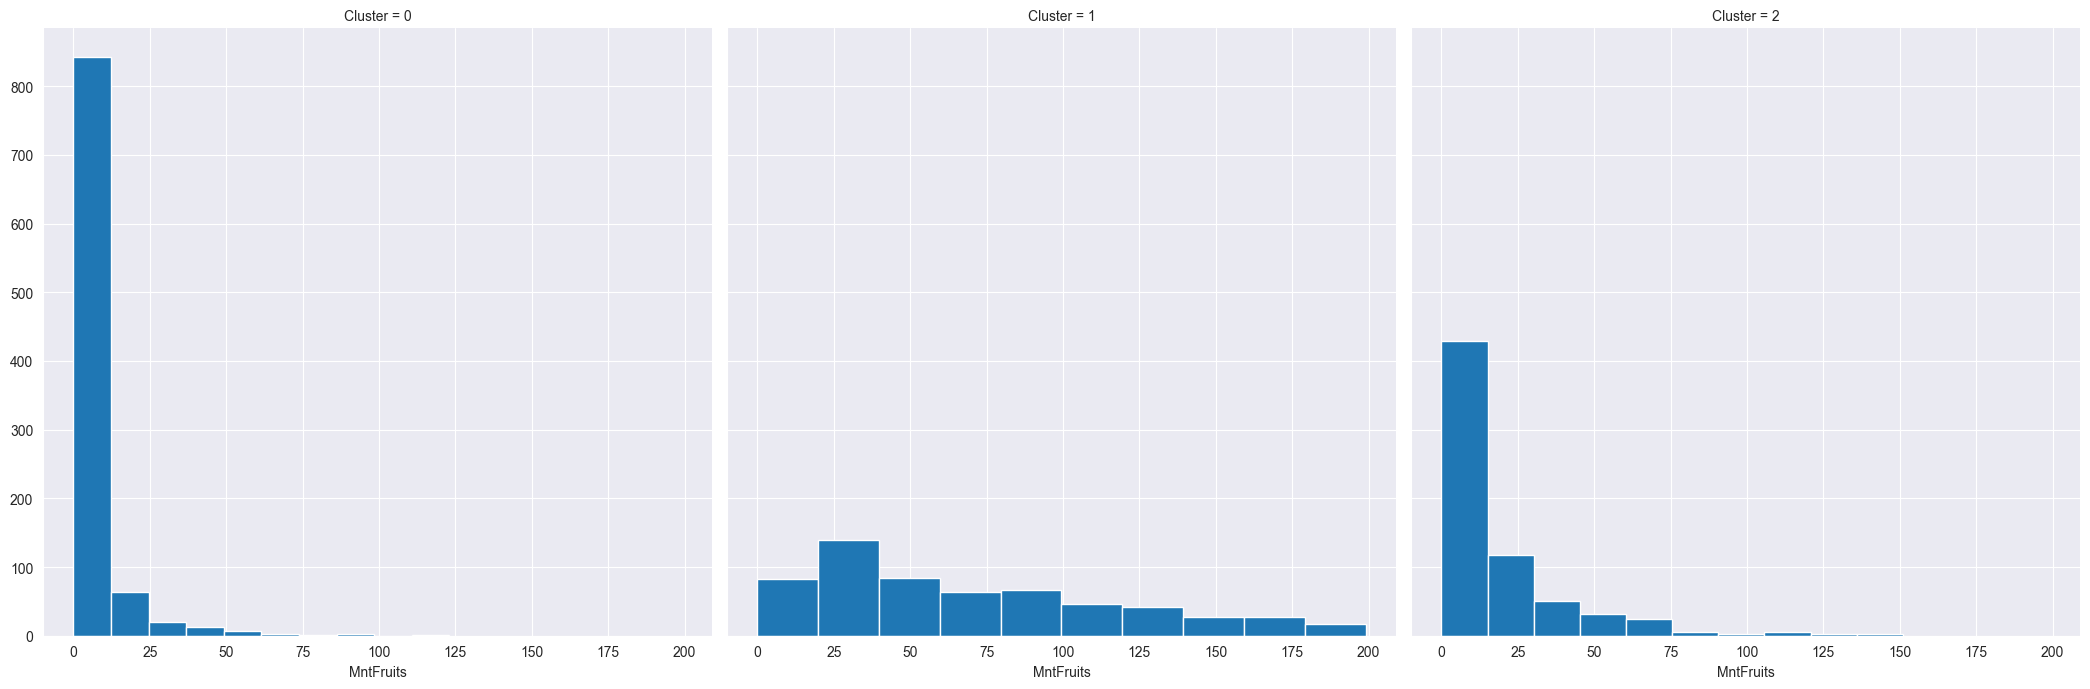

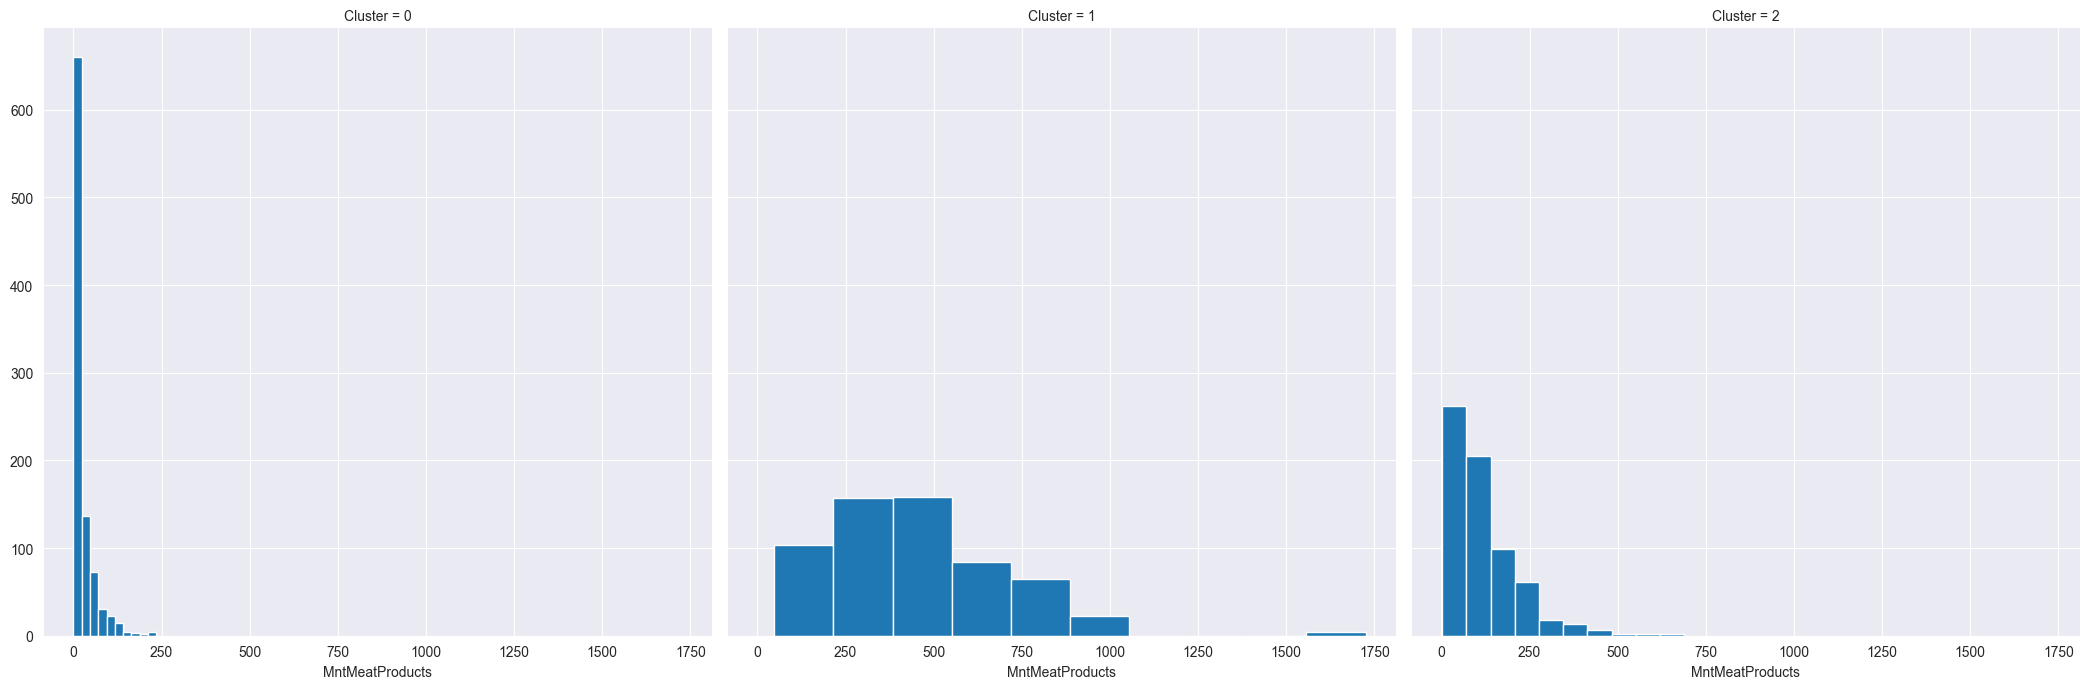

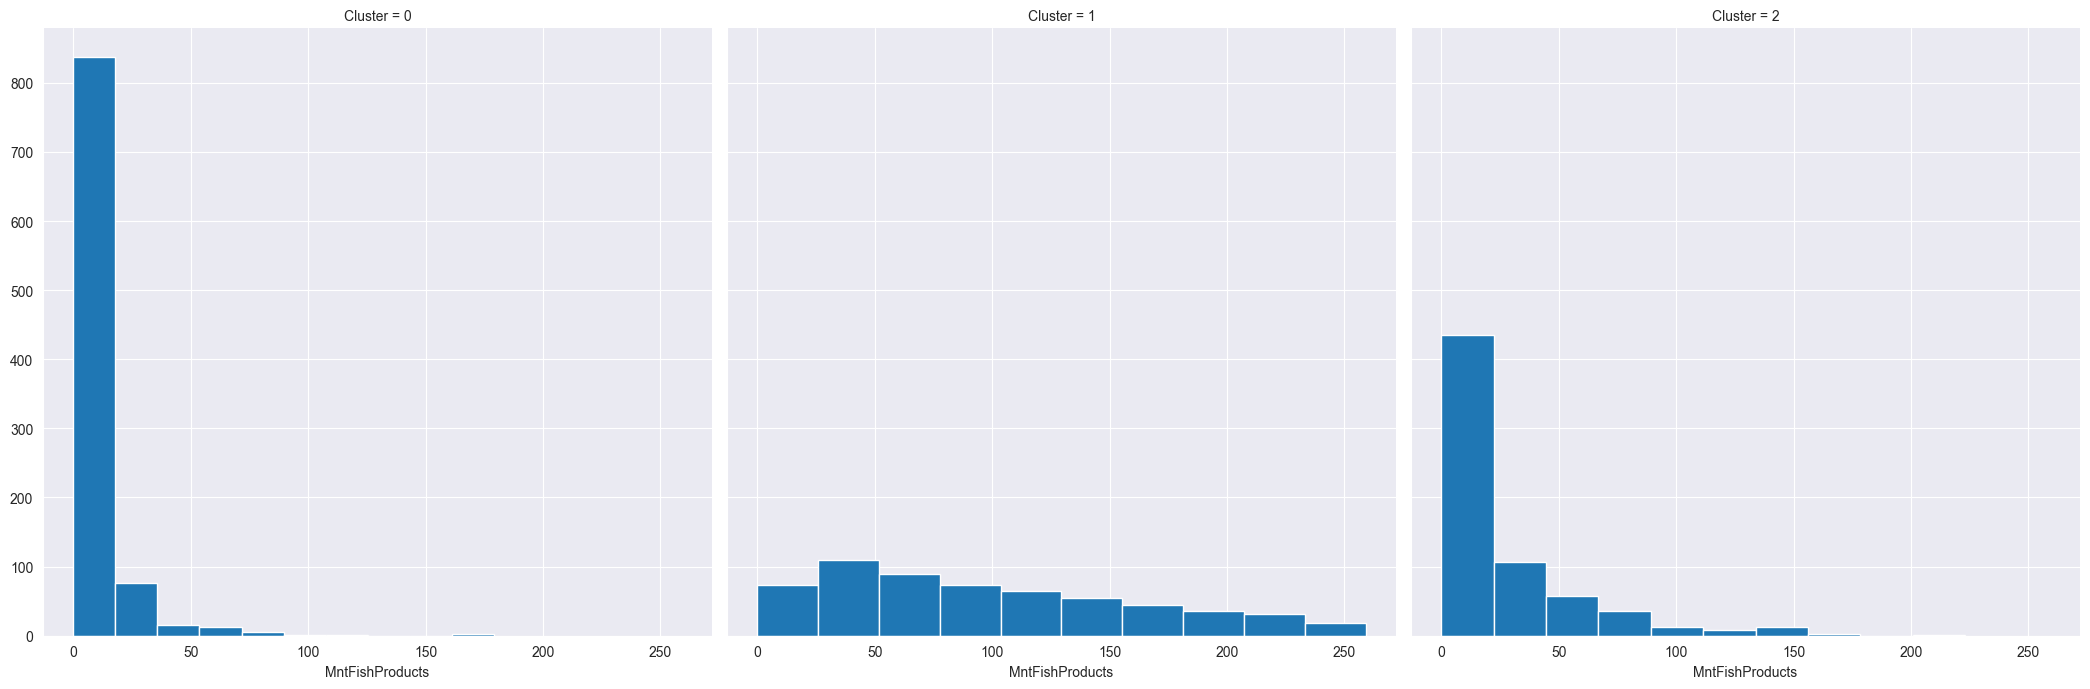

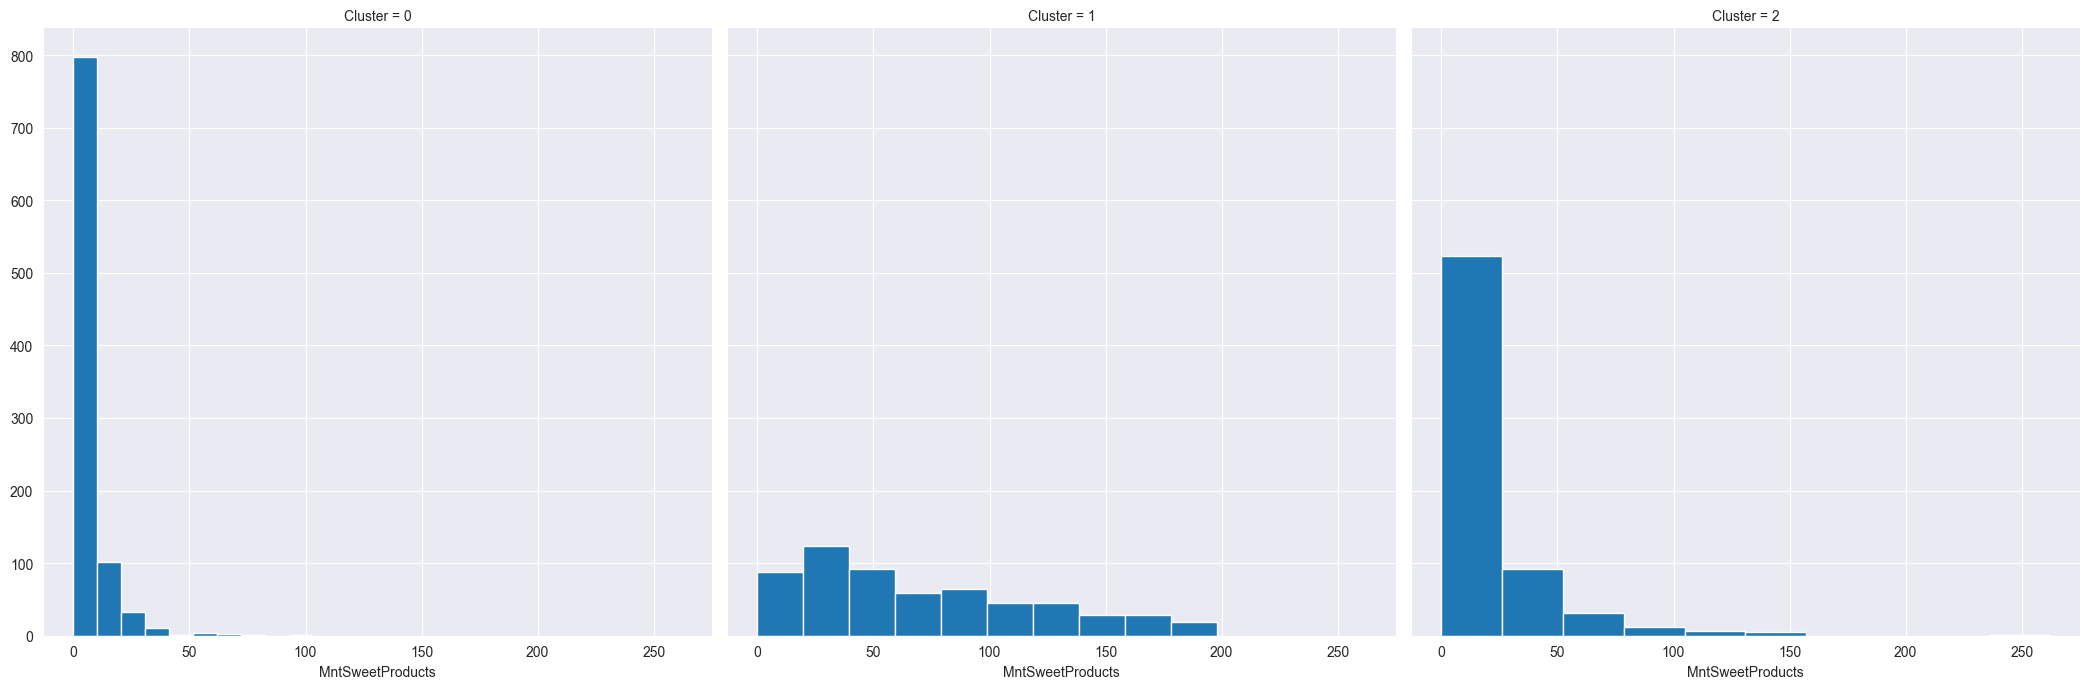

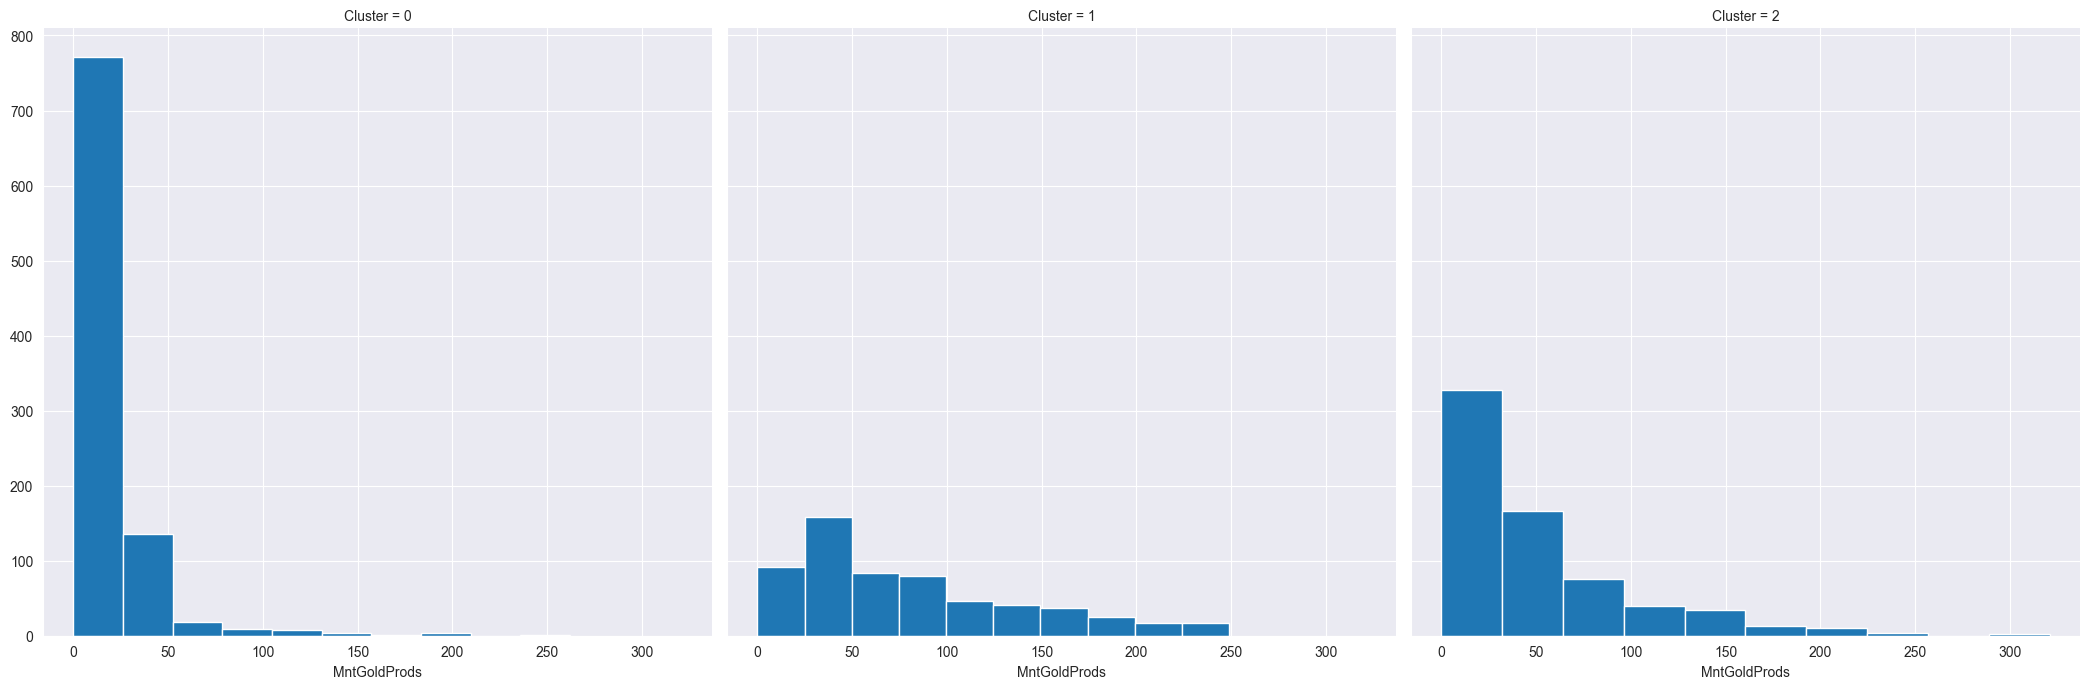

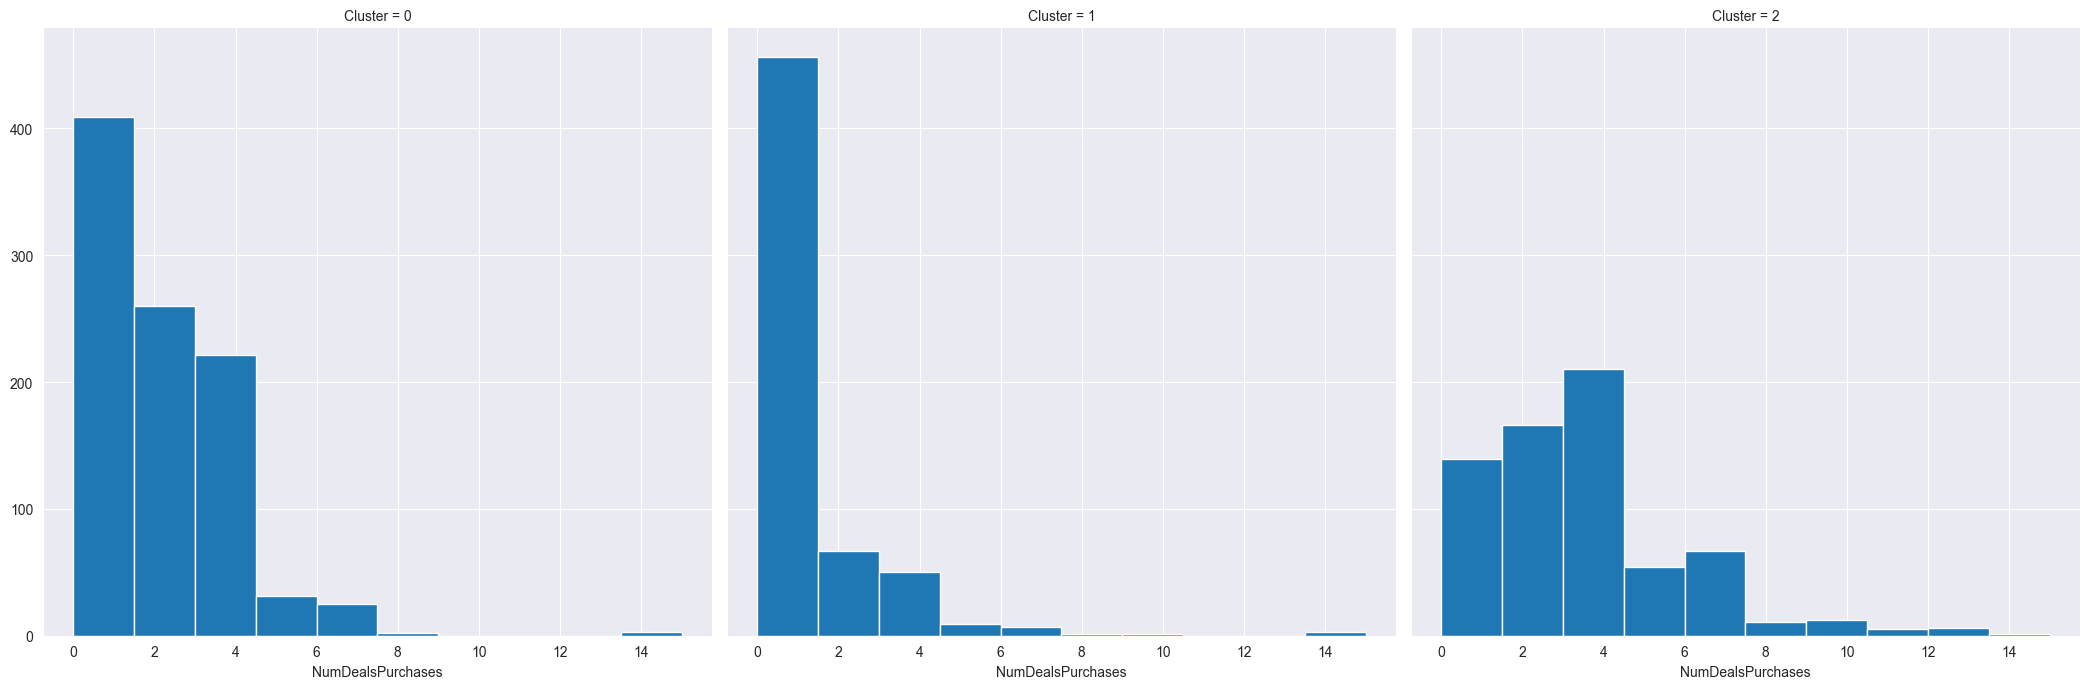

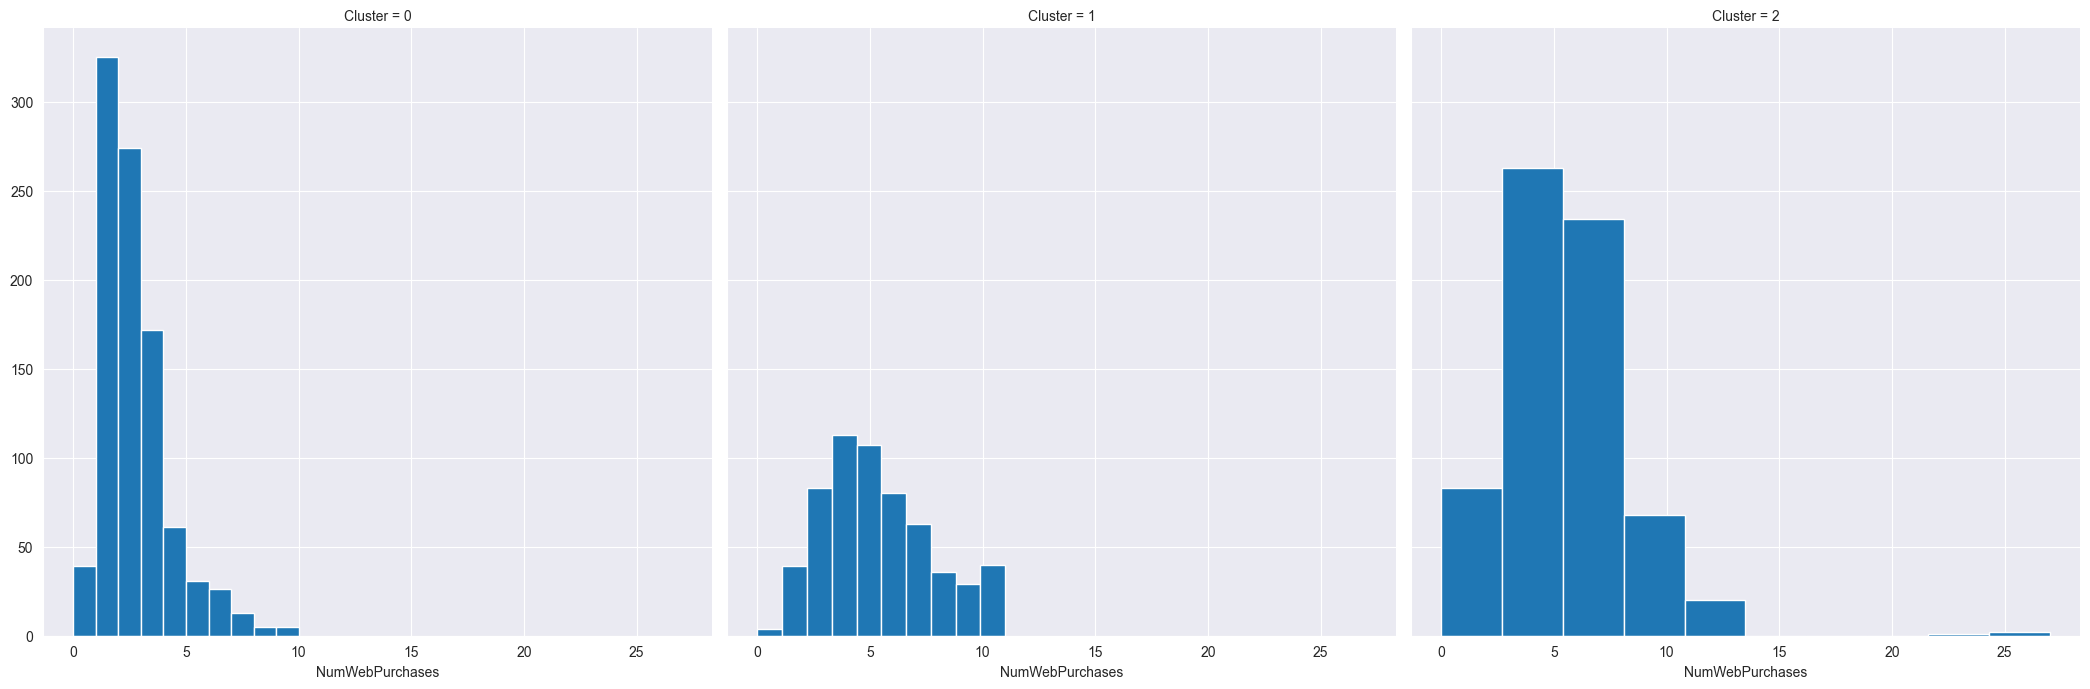

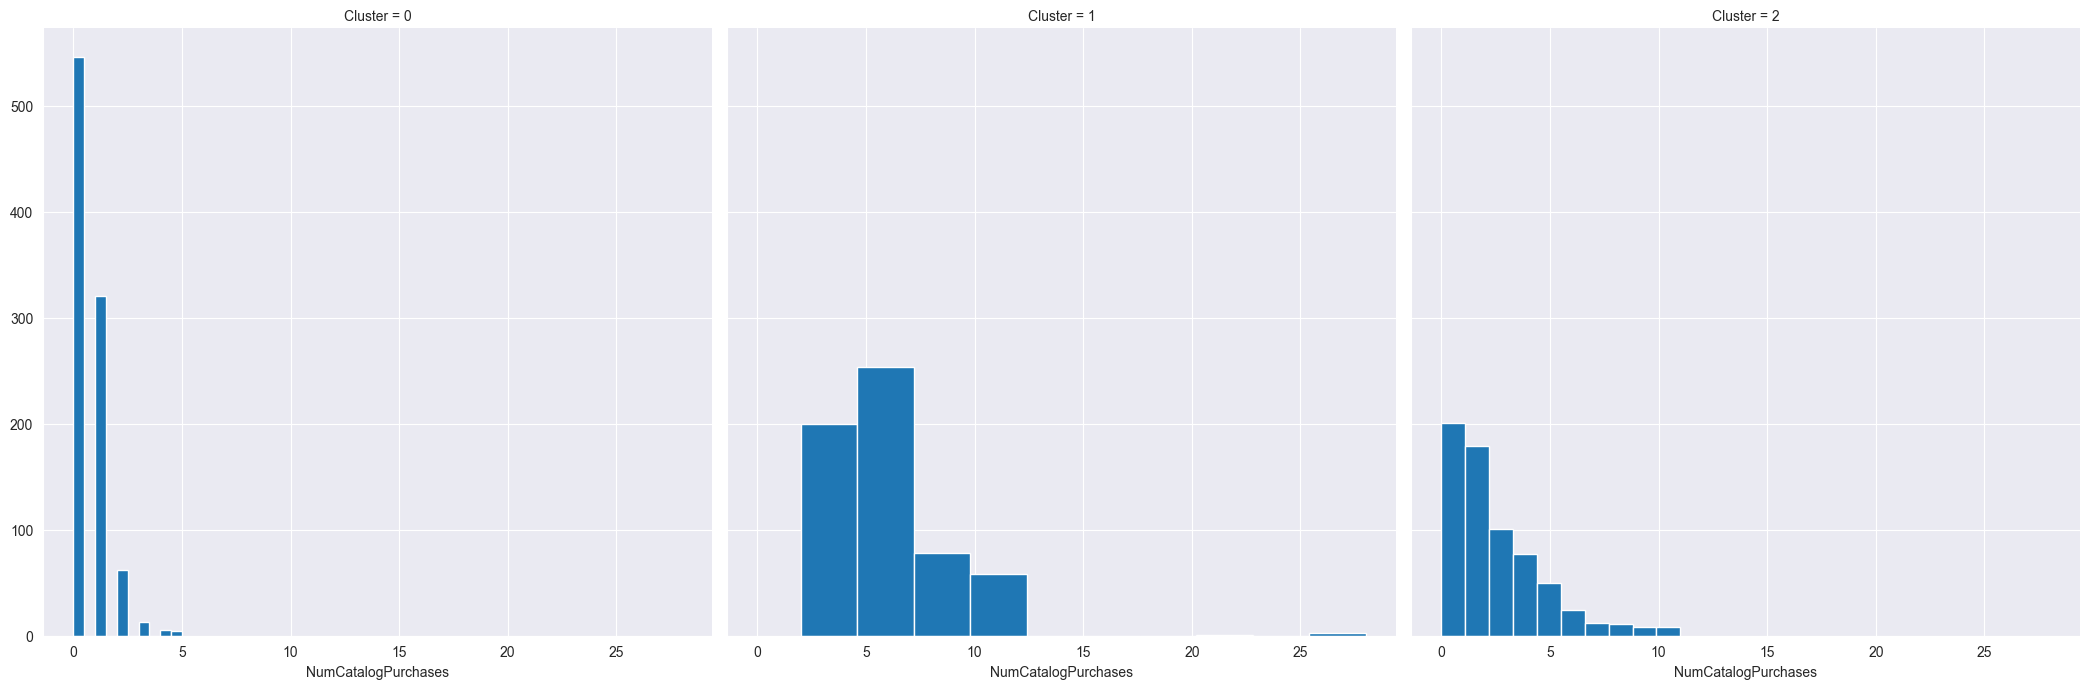

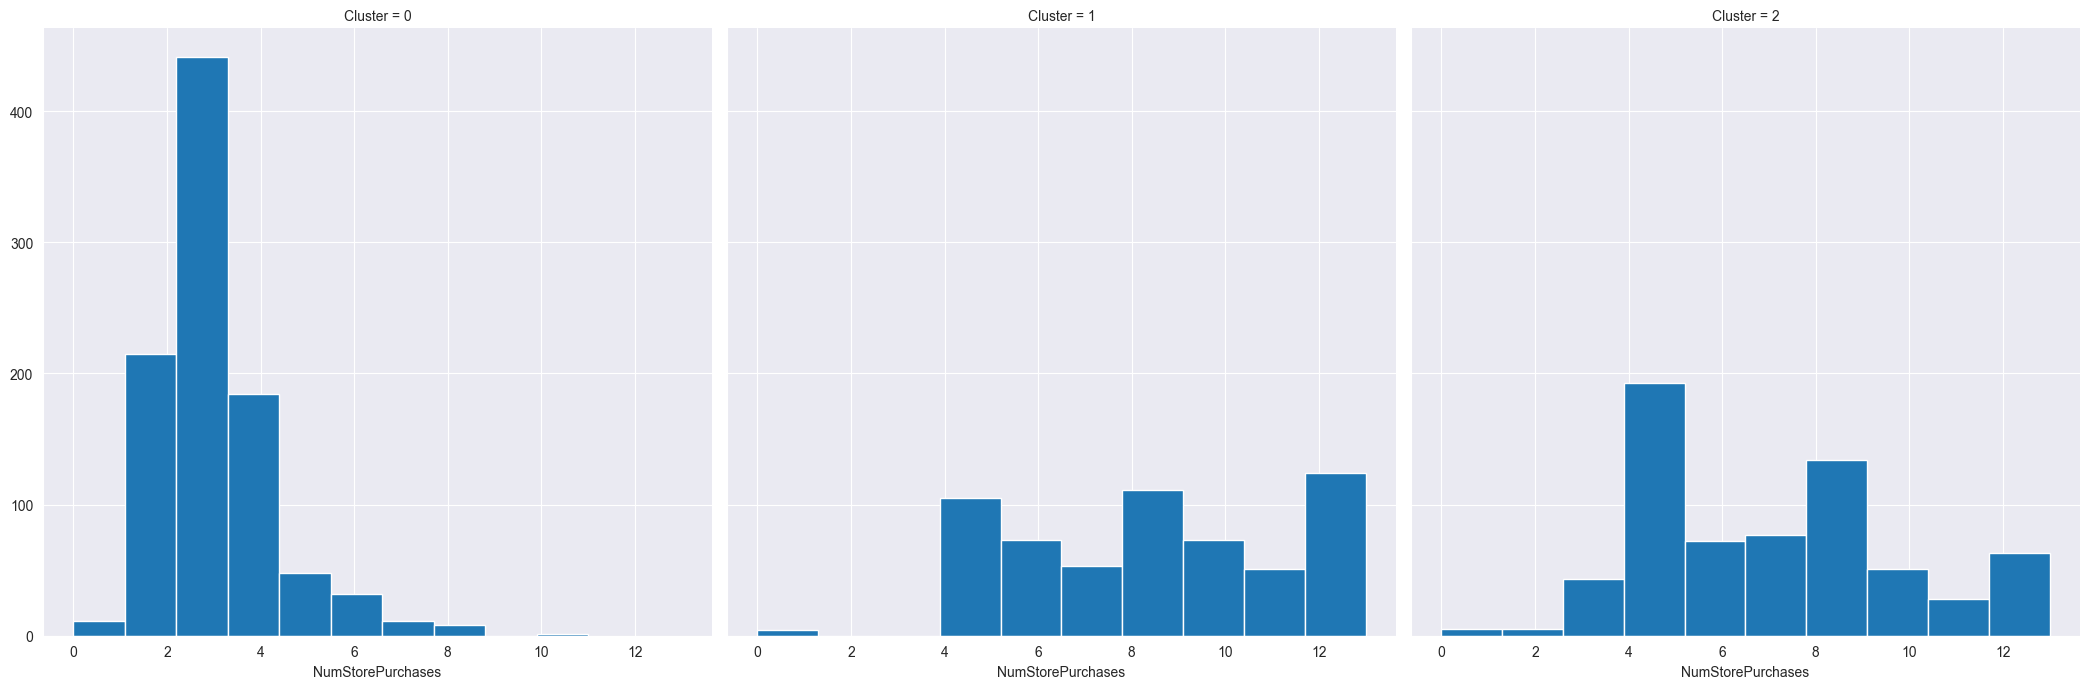

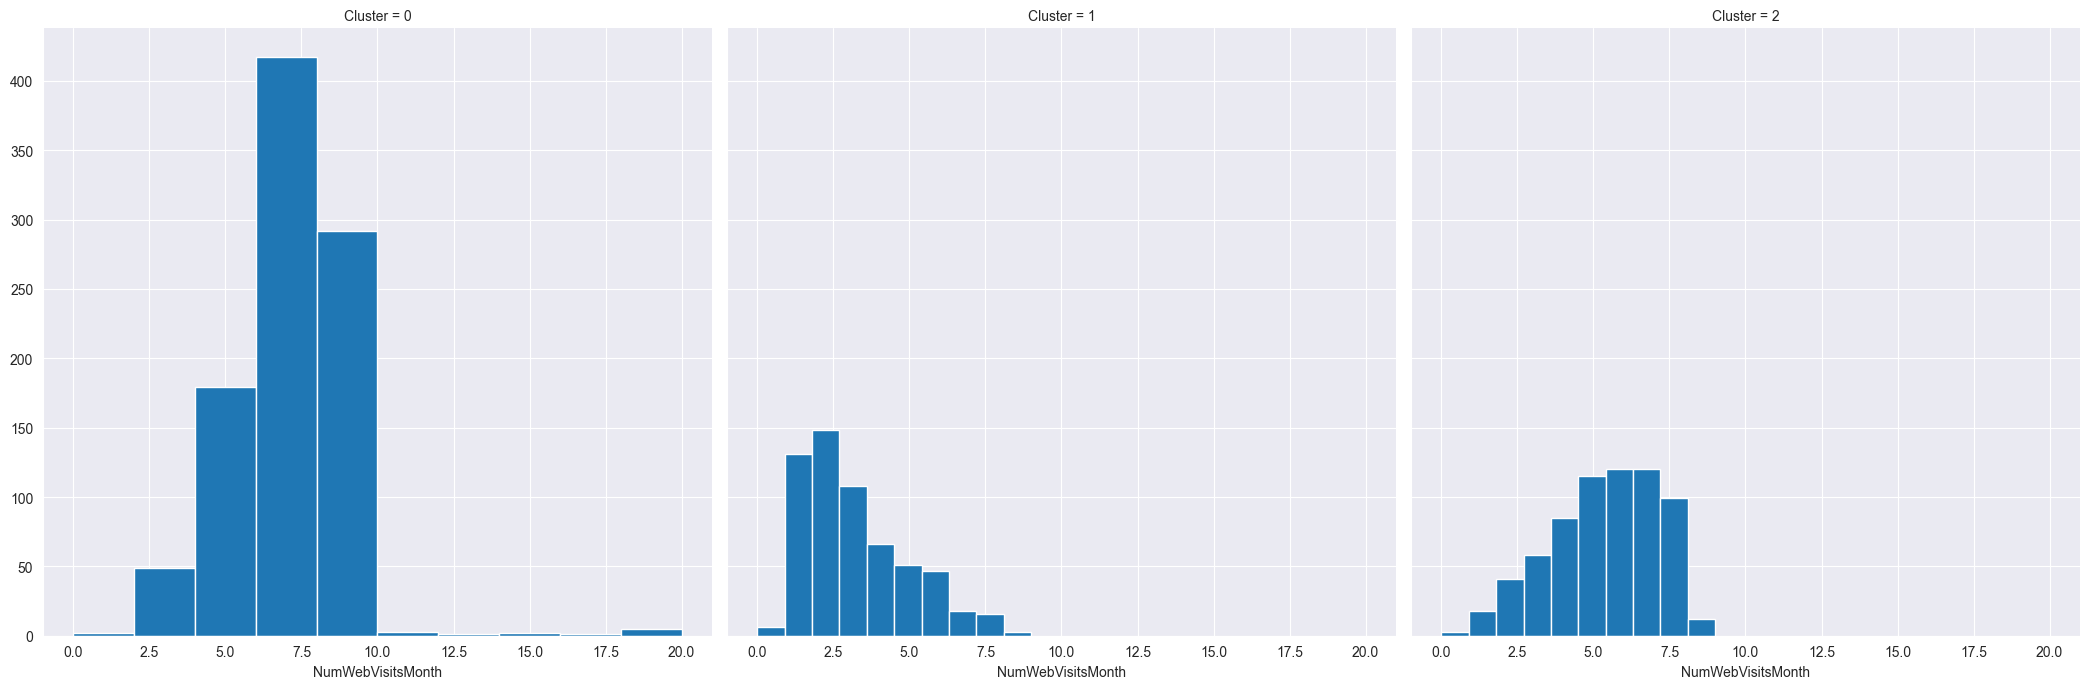

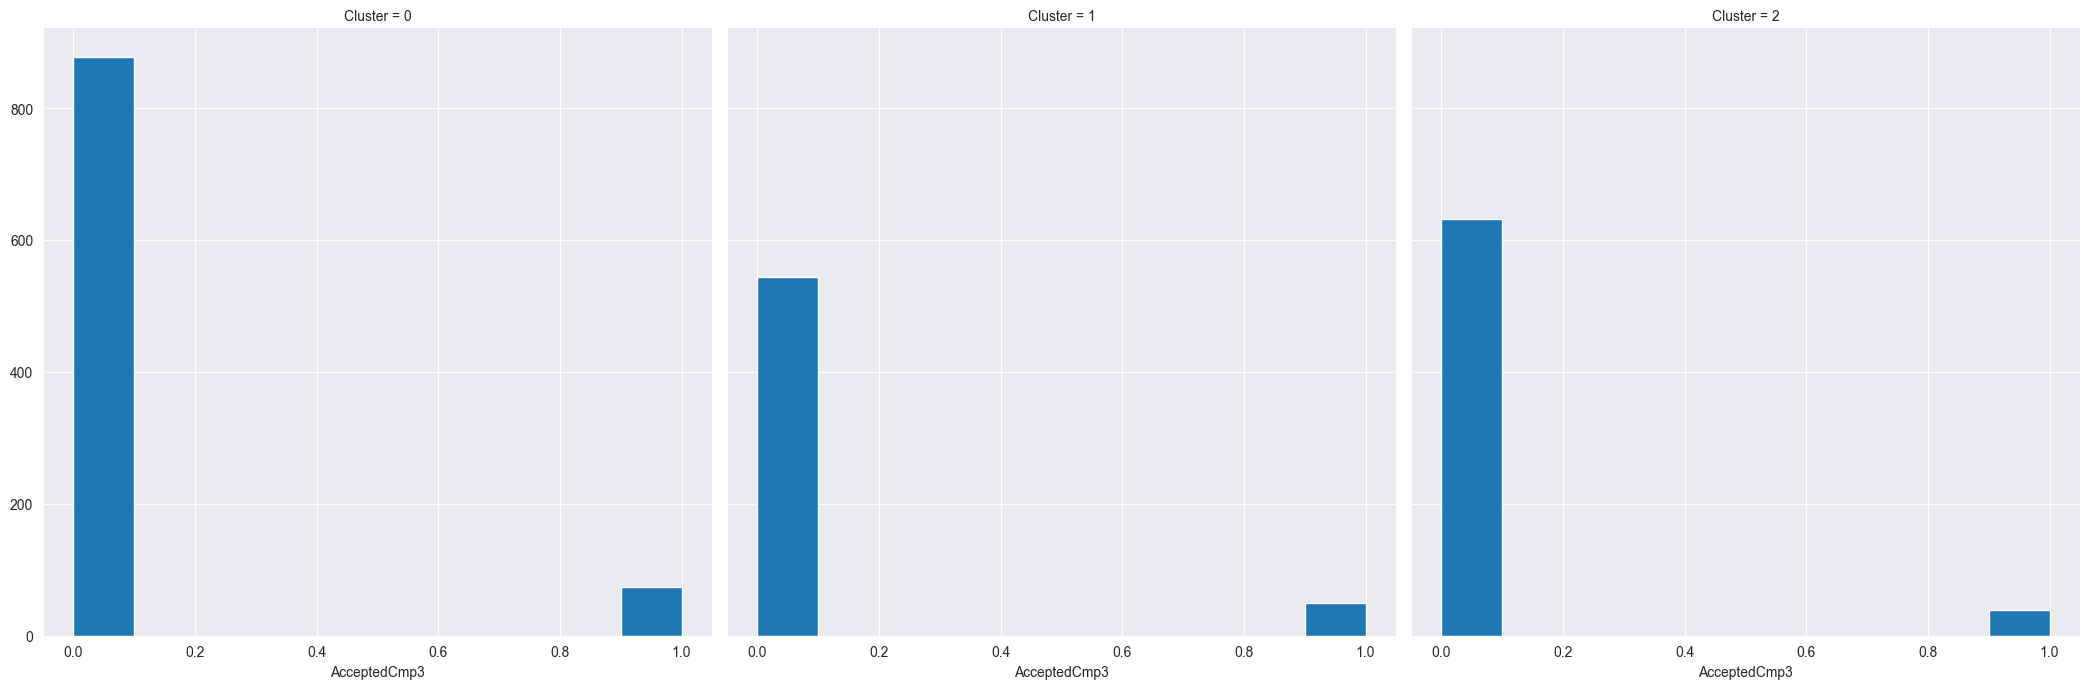

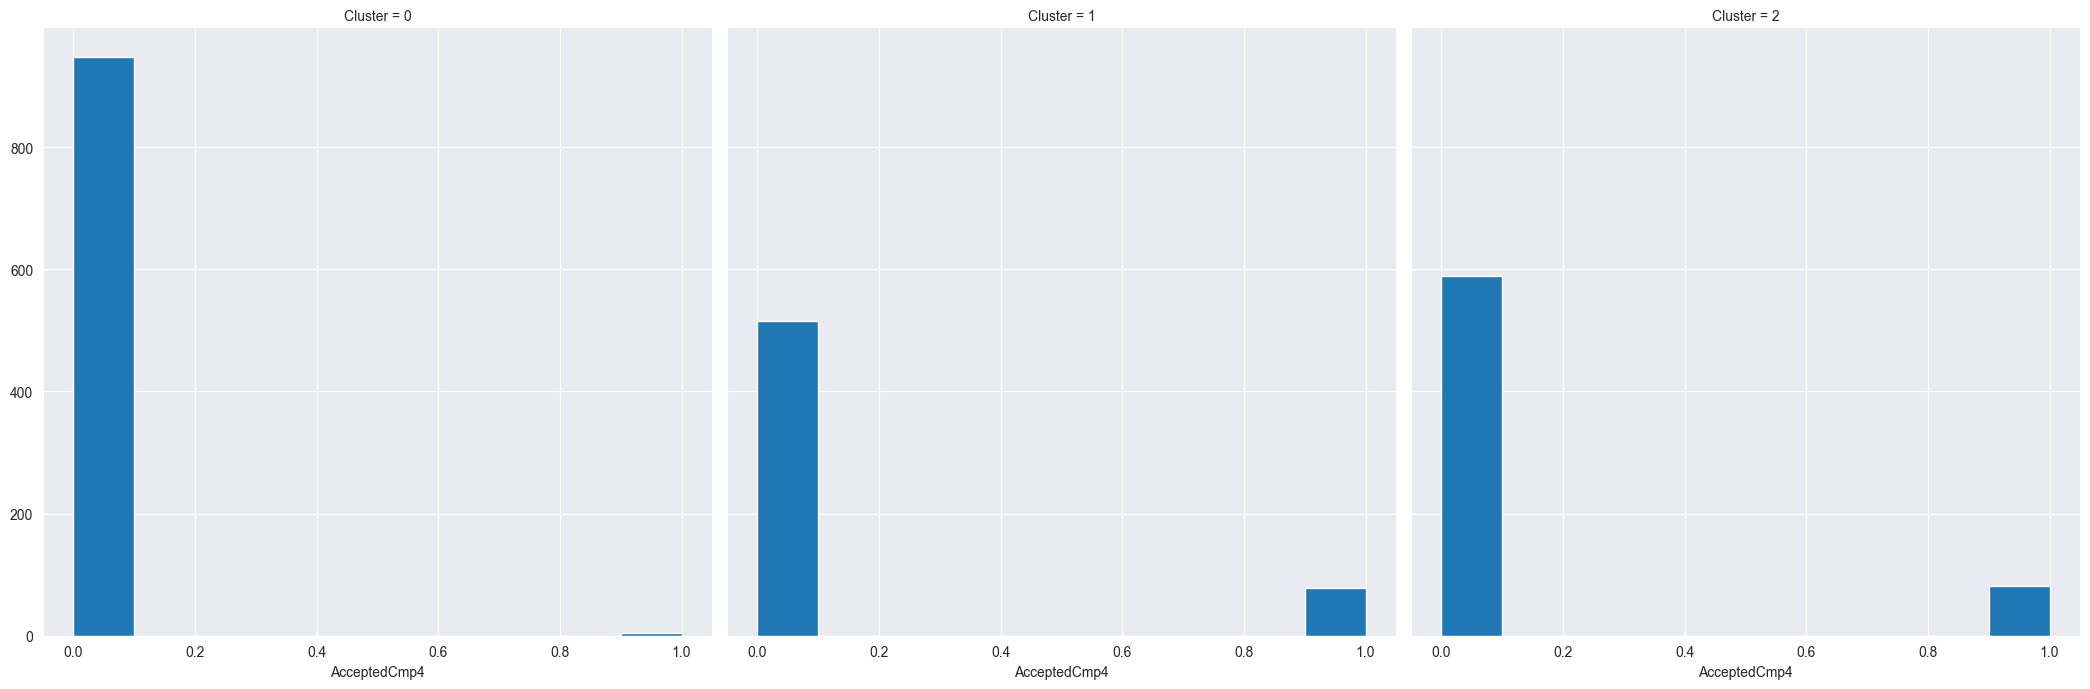

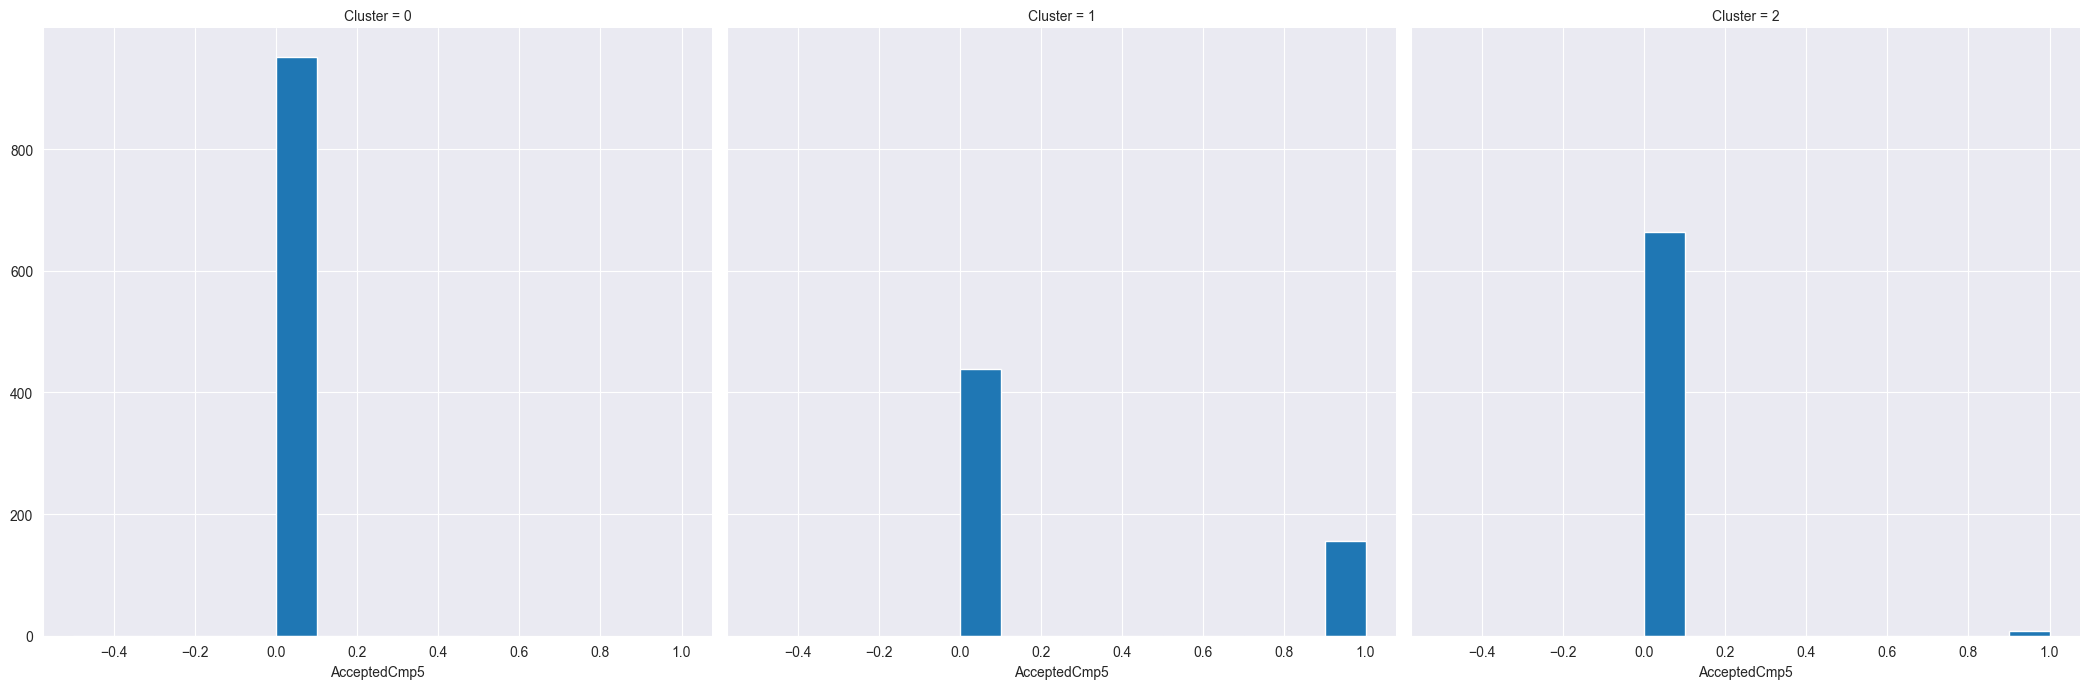

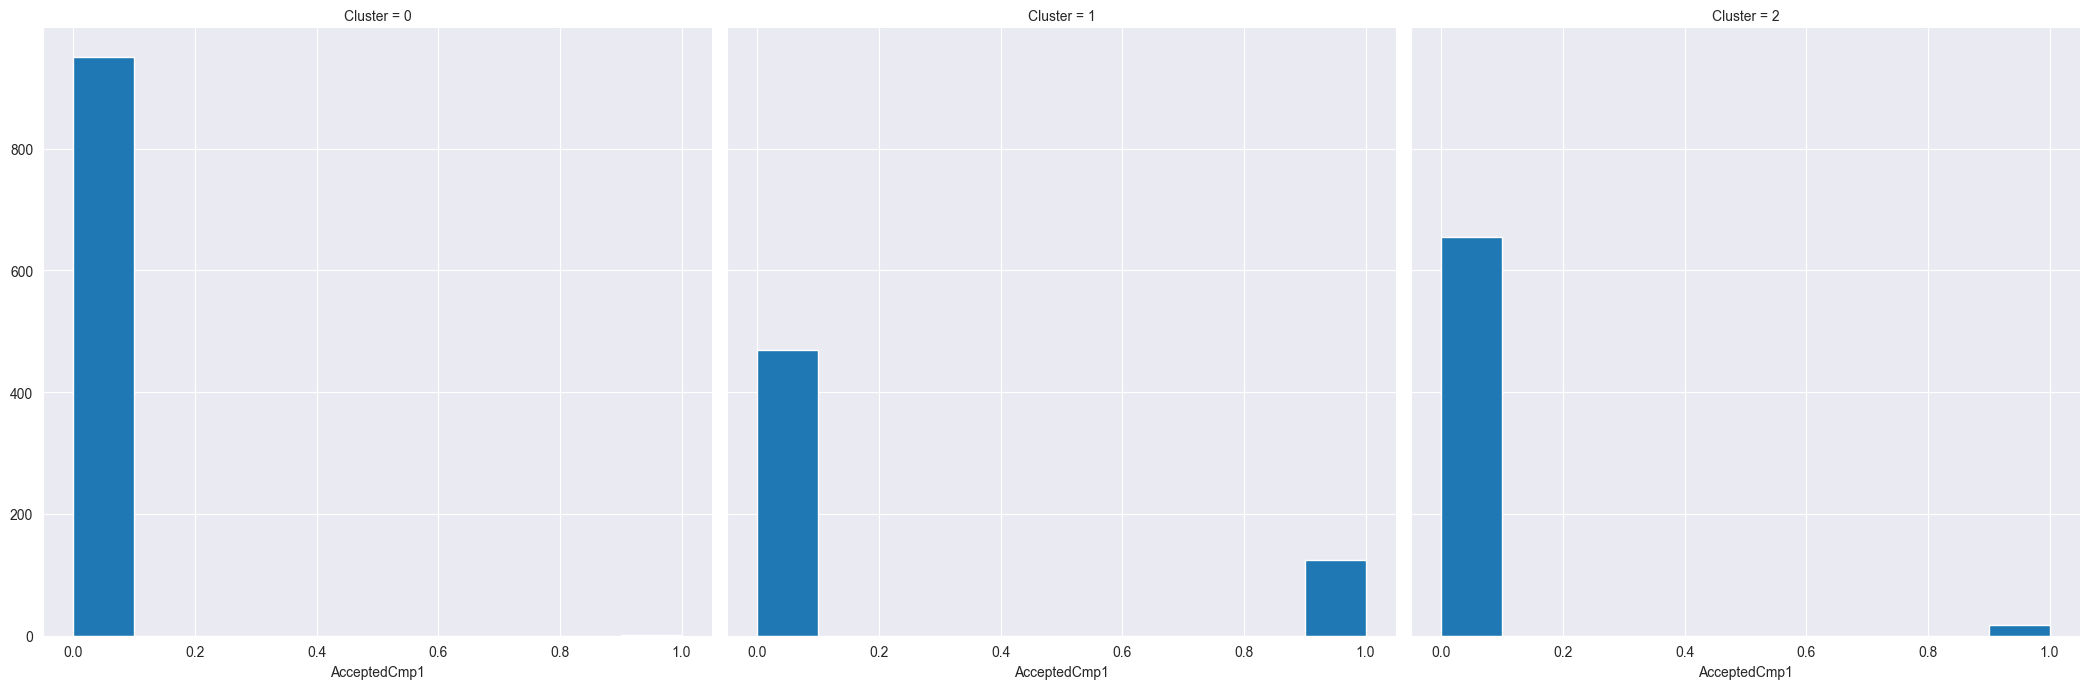

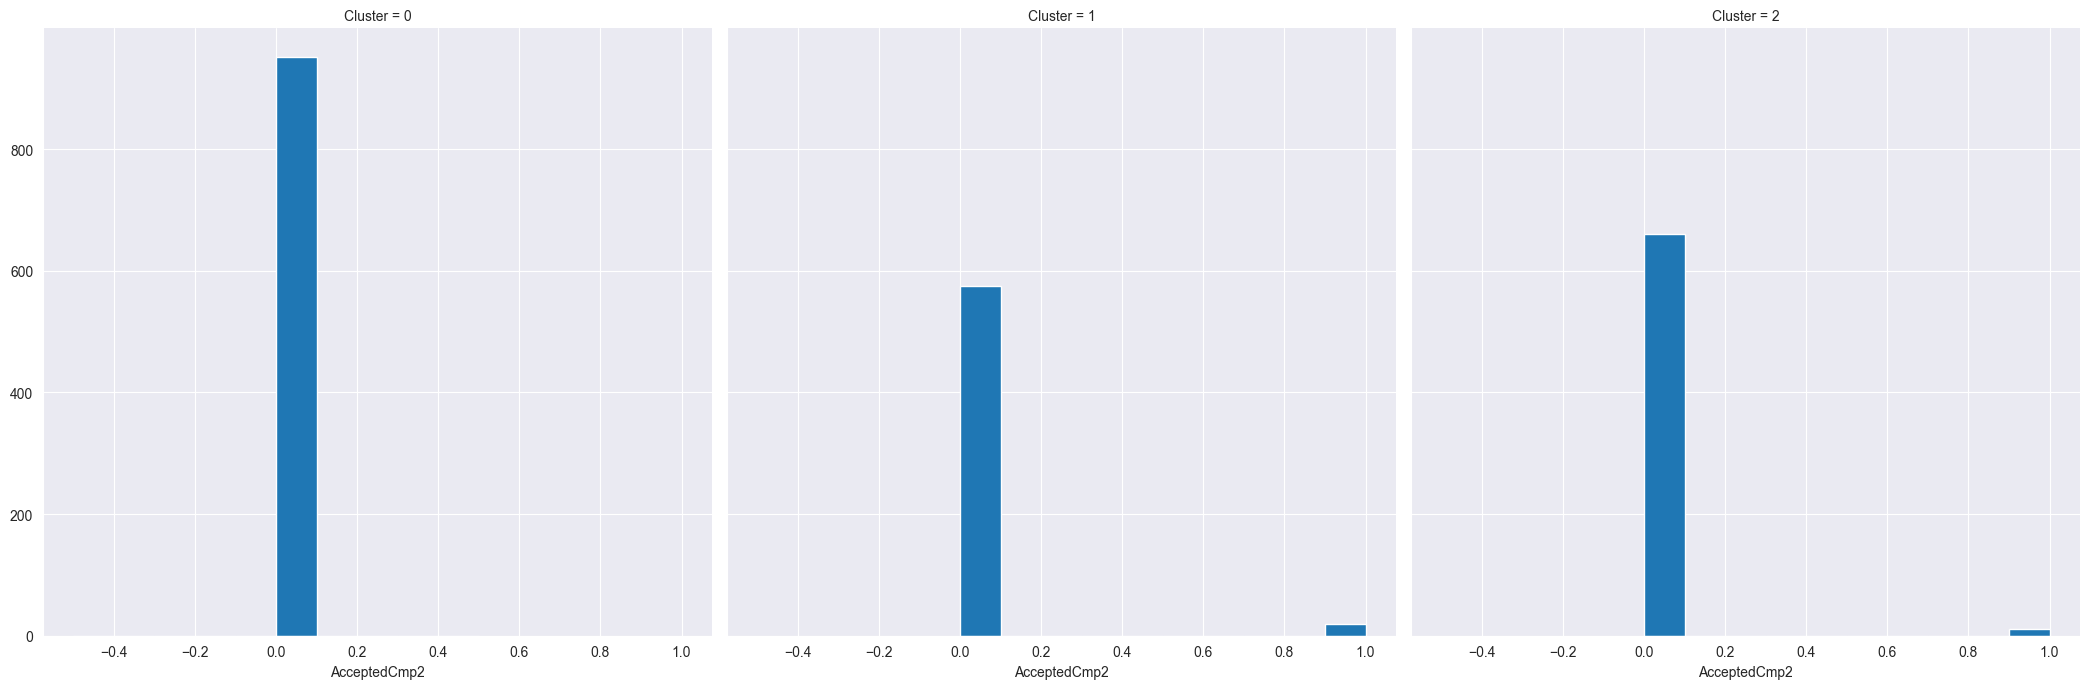

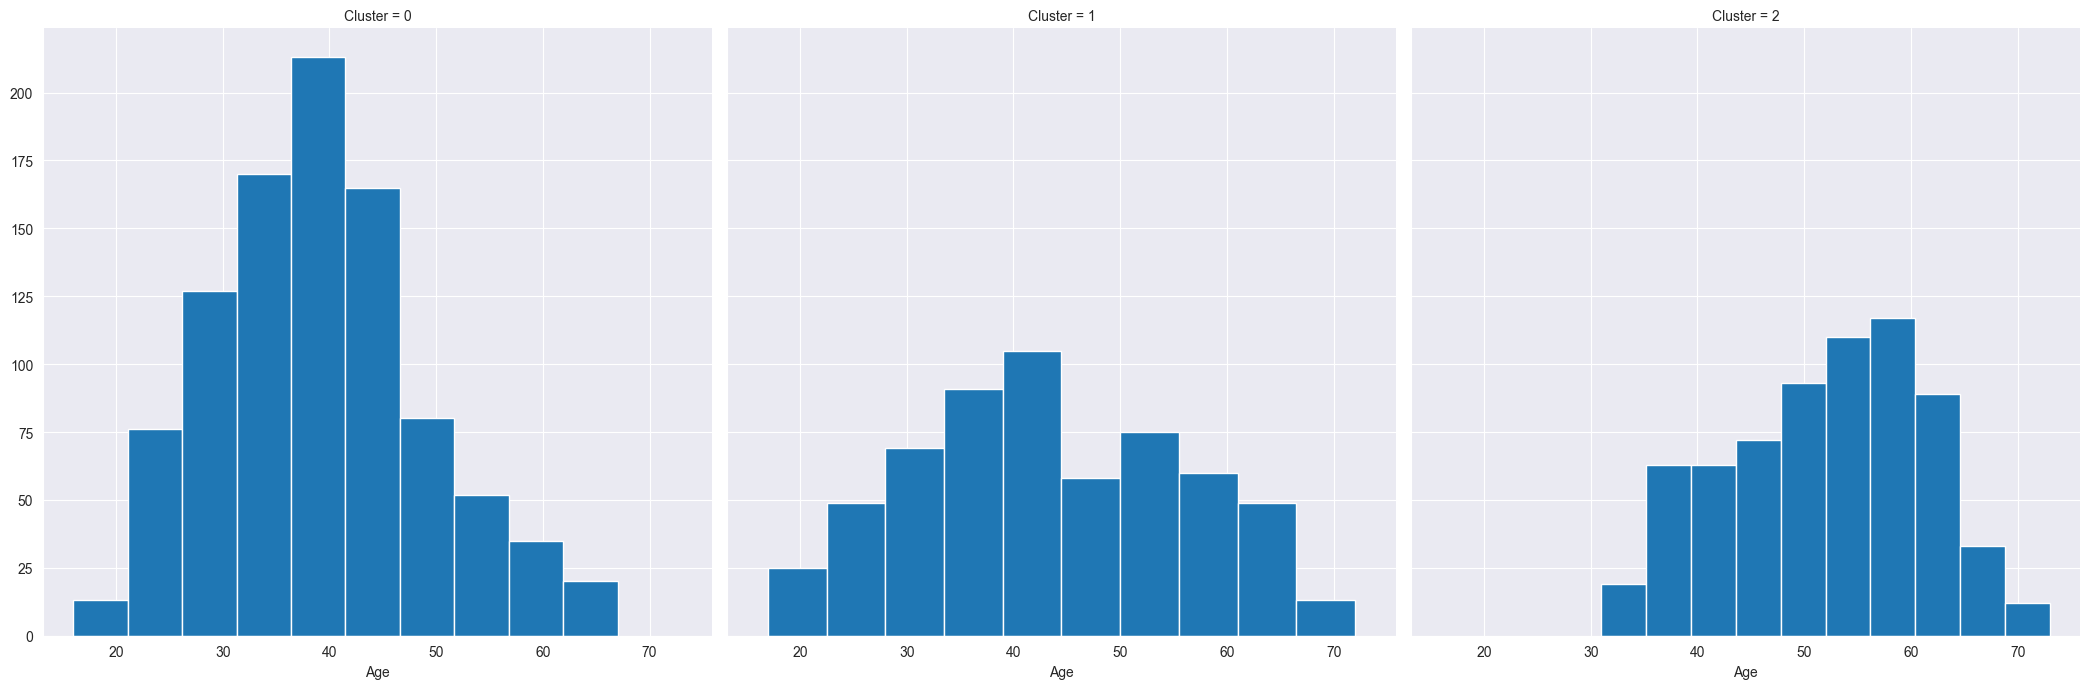

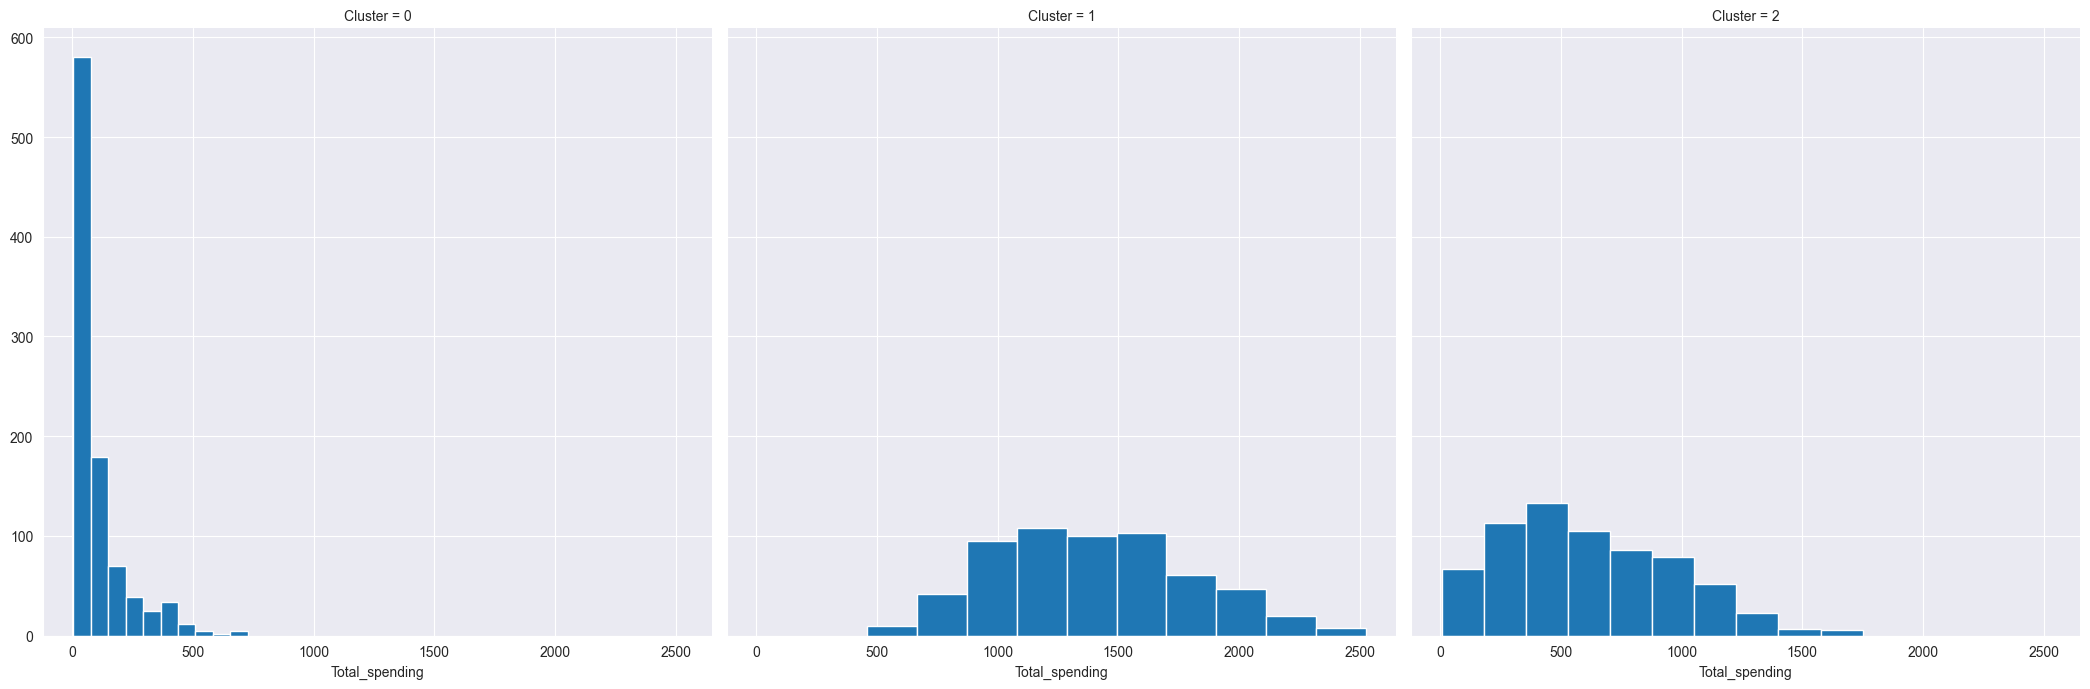

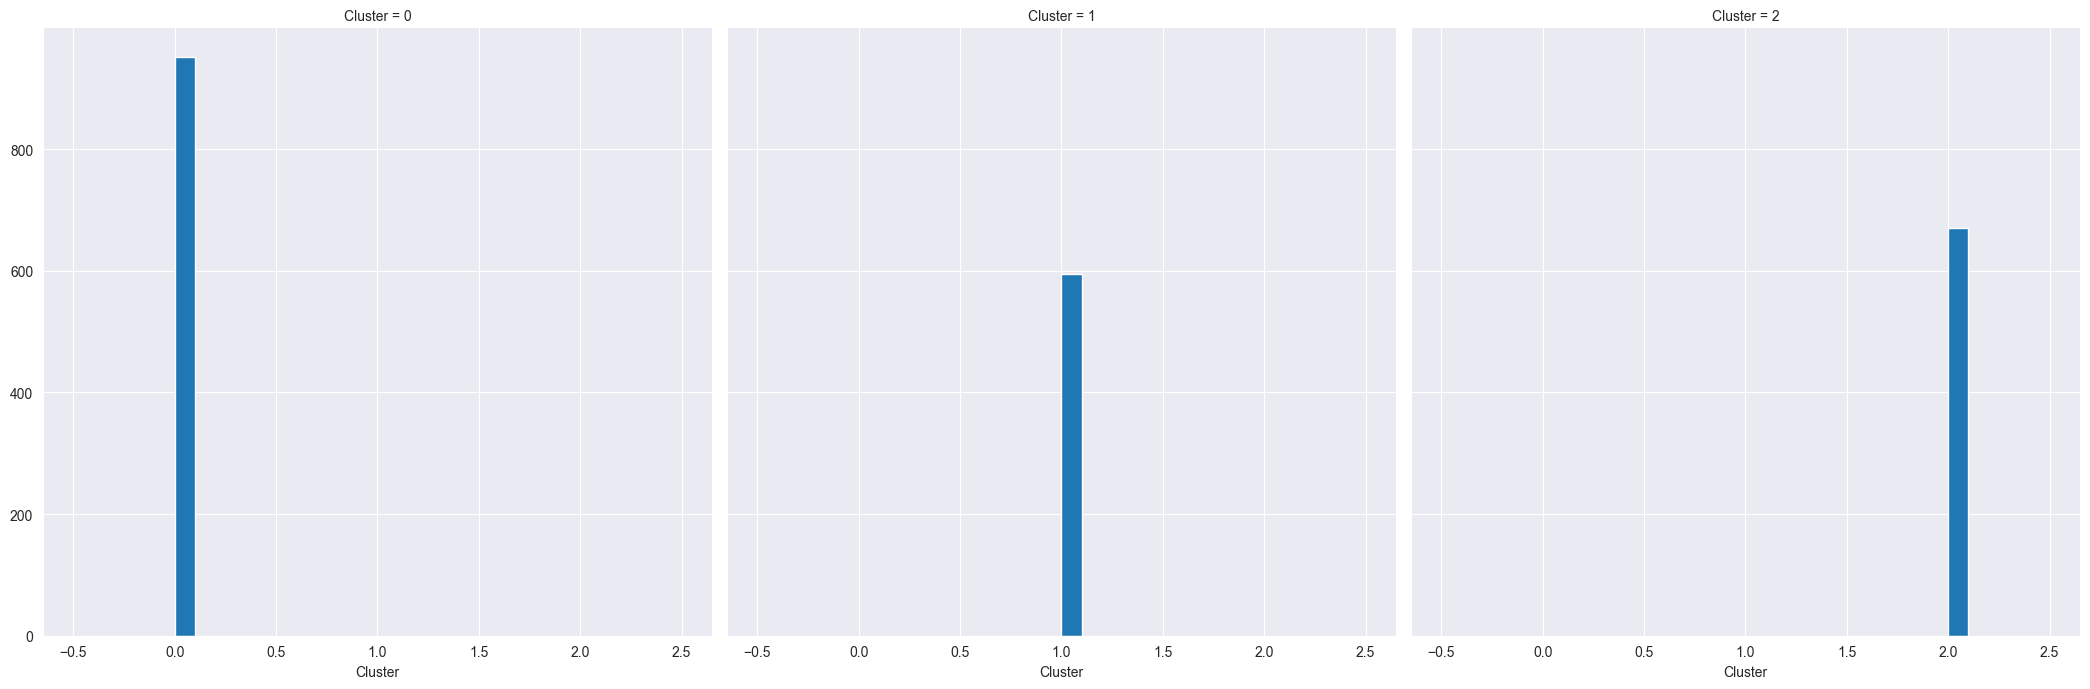

In [108]:
for c in df.drop(['ID','Dt_Customer','Z_CostContact', 'Z_Revenue','Response','Complain'],axis=1):
    grid= sns.FacetGrid(df, col='Cluster',height=7)
    grid= grid.map(plt.hist, c)
plt.show()

# Model Training 

In [109]:
marketing_data['Cluster'] = prediction

In [110]:
X = marketing_data.drop(['Cluster'],axis=1)
y = marketing_data['Cluster']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [112]:
model  = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [113]:
y_prediction = model.predict(X_test)

In [114]:
accuracy_score(y_test,y_prediction)

0.972972972972973

In [115]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.96      1.00      0.98       130
           2       0.97      0.93      0.95       119

    accuracy                           0.97       444
   macro avg       0.97      0.97      0.97       444
weighted avg       0.97      0.97      0.97       444


In [116]:
# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)